ERNEST BRAIMOH REAL DATA AI ML PROJECT

#Background:

We are a small startup focusing mainly on providing machine learning solutions in the European banking market. We work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

We are interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, we are looking for ways to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.

#Data Description:

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

Attributes:

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

y - has the client subscribed to a term deposit? (binary)

IMPORT PACKAGES AND INITIATING TIMING OF THE WHOLE PROCESS

In [2]:
import time
start_run = time.time()

In [3]:
import numpy as np
import pandas as pd
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import matplotlib.ticker as ticker

import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, classification_report

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics

#from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

#for models
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression, Perceptron, RidgeClassifier#PassiveAggressiveClassifier,
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, RidgeClassifierCV

from sklearn.preprocessing import StandardScaler

# feature selection
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

IMPORT THE DATA

In [4]:
# Load data from a csv file
data = pd.read_csv('term-deposit-marketing-2020.csv')
df = pd.DataFrame(data)

DATA PREPARATION AND PREPROCESSING BEGINS

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


DATA CLEANING AND INTEGRITY CHECK

In [6]:
#Checking column types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB
None


In [7]:
print(df.shape)  # Print the shape of the DataFrame (number of rows, number of columns)
print(df.describe())  # Statistical summary of the numerical columns of the dataset

(40000, 14)
                age        balance           day      duration      campaign
count  40000.000000   40000.000000  40000.000000  40000.000000  40000.000000
mean      40.544600    1274.277550     16.017225    254.824300      2.882175
std        9.641776    2903.769716      8.278127    259.366498      3.239051
min       19.000000   -8019.000000      1.000000      0.000000      1.000000
25%       33.000000      54.000000      8.000000    100.000000      1.000000
50%       39.000000     407.000000     17.000000    175.000000      2.000000
75%       48.000000    1319.000000     21.000000    313.000000      3.000000
max       95.000000  102127.000000     31.000000   4918.000000     63.000000


CHECKING FOR MISSING VALUES IN DATA

In [8]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


INPUTS VISUALIZATIONS FUNCTIONS

In [9]:
#The function below creates a dataframe with count and frequencies for a given column.
def value_counts_percentage(dataset, column):
    ''' value.counts() method extended by displaying percentage '''

    a = dataset[column].value_counts()
    b = dataset[column].value_counts(normalize=True) * 100

    return pd.concat([a,b.round(2)], axis=1, keys=['N', '%'])

In [10]:
def plot_density(dataset, col, ax, plot_gaussian = True, color="Blue"):
    '''
    Extension of the seaborn histogram that plots, for a given column,
    an estimated normal distribution (if requested) on top of the fitted data distribution.
    '''
    ncount = len(dataset)

    if plot_gaussian:
        std = dataset[col].std()
        mean = dataset[col].mean()

    #plot histogram using seaborn
    ax = sns.histplot(dataset[col], ax=ax, color=color, kde=True, stat="probability", kde_kws={"bw_adjust":3})

    if plot_gaussian:
        # Limiting our gaussian to the limits from the above plot
        xmin, xmax = ax.get_xlim()
        xnorm = np.arange(xmin, xmax, 0.001)
        ynorm = norm.pdf(xnorm, mean, std)
        ax.plot(xnorm, ynorm, 'r', lw=2)
        ax.legend(["data distribution", "estimated normal distribution"], loc="upper center",
                  bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

    ax.set_title(col)
    ax.set_xlabel("")


def plot_pie(dataset, col, ax):
    '''
    Pandas' pie plot wrapper
    '''
    ax = dataset[col].value_counts().plot(kind='pie', ax=ax)
    ax.set_title(col)
    ax.set_ylabel("")

def plot_count(dataset, col, ax, order = None, show_percent=True, rotate_label = True, add_args={"palette": "Set2"}):
    '''
    Extending the seaorn countplot to get frequencies and counts in a pretty way.
    '''

    ncount = len(dataset)

    if order is None:
        order = np.sort(dataset[col].unique())

    # plot seaborn countplot
    ax = sns.countplot(data=dataset, x=col, ax=ax, order=order, **add_args)

    # Get y limit (number of elements)
    _ ,max_nb = ax.get_ylim()
    # Transform this limit into a frequency in [0, 100]
    freq_lim = (max_nb * 100/ ncount)

    # Duplicate the ax
    ax2 = ax.twinx()

    #Move duplicate y axis ticks to the left
    ax2.yaxis.tick_left()

    #Move original y axis ticks to the right
    ax.yaxis.tick_right()

    # Swap the label positions to match the ticks
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')

    # We want to write the frequency on top of each bar
    if show_percent:
        # for every bar
        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            if not math.isnan(x.mean()) and not math.isnan(y):
                # Write frequency at an x and y coordinate
                ax.text(x.mean(), y, '{:.1f}%'.format(100.*y/ncount),
                    ha='center', va='bottom')

    # Set y axis limit for counts and frequencies
    ax2.set_ylim(0,freq_lim)
    ax.set_ylim(0,max_nb)

    # set ticks for count
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    ax.yaxis.set_tick_params(which="major")

    # set ticks for frequencies
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(freq_lim/10))
    ax2.yaxis.set_tick_params(which="major")

    # remove grid for ax 2 (keep only ax)
    ax2.grid(False)
    ax.grid(False)
    ax.set_xlabel("")
    if rotate_label:
        # rotate tick labels on the x axis / / /
        _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.set_title(col)

def plot(kind, dataset, columns=None, fig_title="Count/Frequency plots", fontsizes = 10, **kwargs):
    '''
    Wrapper function that takes care of plot wise sizes and calling the wanted procedure
    '''

    # plot choices
    kind_dict = {
        'pie': plot_pie,
        'count': plot_count,
        'density': plot_density}

    if kind not in kind_dict:
        raise ValueError(f"{kind} is not a valid kind, has to be one of {kind_dict.keys()}")

    if columns is None:
        # us all dataset columns
        columns = list(dataset.columns)

    fig = None

    # Setting font sizes
    plt.rc('xtick', labelsize=fontsizes*1.5)
    plt.rc('ytick', labelsize=fontsizes*1.5)
    plt.rc('axes', labelsize=fontsizes*2)
    plt.rc('legend', fontsize=fontsizes*1.5, title_fontsize=0)
    plt.rc('axes', titlesize=2*fontsizes)
    plt.rc('font', size=1.7*fontsizes)

    # Scale of the figure in ax (to be used later)
    figsize_scale = fontsizes

    if not isinstance(columns, list):
        # columns has to be a list
        if isinstance(columns, str):
            columns = [columns]
        else:
            columns = list(columns)

    if len(columns) == 1: # Only variable to plot
        ncols, nrows = 1, 1
        figsize_scale *= 1.5 # double figsize
    else:
        ncols, nrows = 2, math.ceil(len(columns) / 2)

    fig, axes = plt.subplots(figsize=(figsize_scale*2*ncols, figsize_scale*0.75*nrows), nrows=nrows, ncols=ncols)

    if ncols == 1 and nrows == 1:
        # We need a list of axes
        axes = np.array([axes])

    # Plot
    do_plots(dataset, columns, axes, kind_dict[kind], **kwargs)

    fig.suptitle(fig_title + "\n\n", fontsize=fontsizes*2.5)
    plt.tight_layout()
    #Reset plot setting to original
    sns.reset_orig()

def do_plots(dataset, columns, axes, plot_func, **kwargs):
    '''
    Calls the plotting function on every axis and removes unused axes.
    '''
    axes = axes.flat

    #plot every variable
    for index, col in enumerate(columns):
        plot_func(dataset, col, axes[index], **kwargs)

    # remove empty axes
    for empty in range(len(columns), len(axes)):
        axes[empty].axis("off")

**AGE**

        N     %
age            
32   1909  4.77
31   1826  4.57
33   1770  4.42
34   1730  4.32
35   1721  4.30
..    ...   ...
90      1  0.00
94      1  0.00
86      1  0.00
95      1  0.00
81      1  0.00

[70 rows x 2 columns]


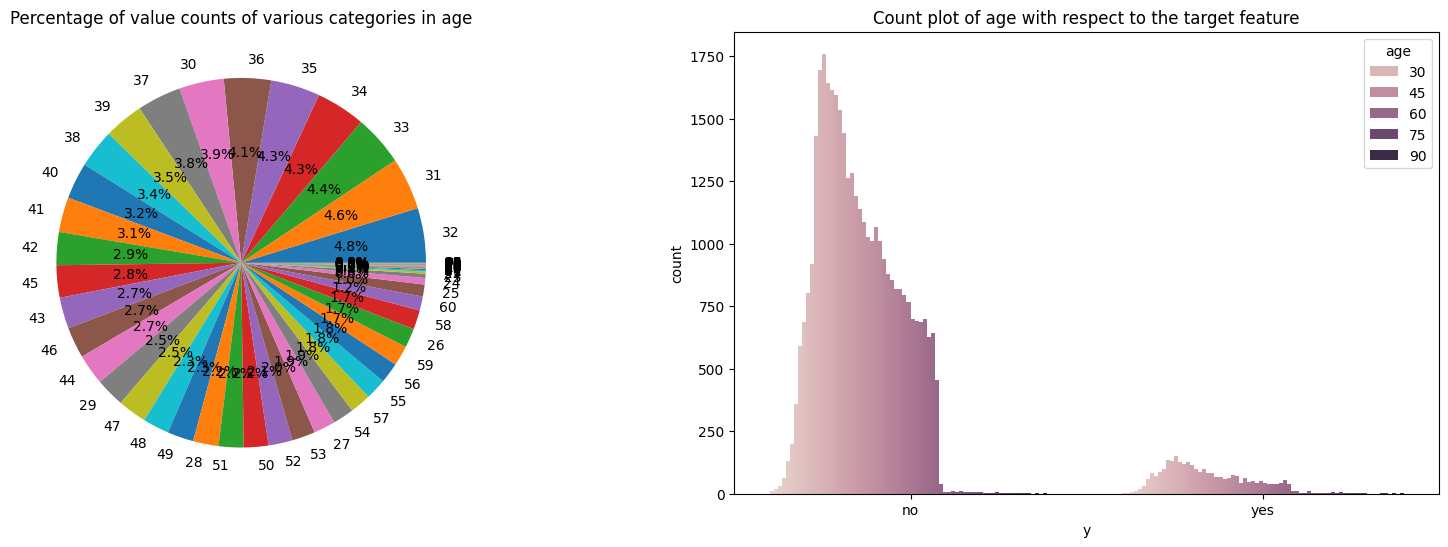

In [11]:
print(value_counts_percentage(df, 'age'))
#VISUALIZING THROUGH PIE CHART AND CATEGORIZED COUNTPLOT
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))
ax1 = axes[0]
ax2 = axes[1]
sns.countplot(x = 'y', hue = 'age', data = df, ax = ax2)
ax2.set_title('Count plot of age with respect to the target feature')
ax1.pie(x = df['age'].value_counts(normalize=True), labels = df['age'].value_counts().index,\
       autopct='%1.1f%%', radius = 1)
ax1.set_title('Percentage of value counts of various categories in age')
plt.show()

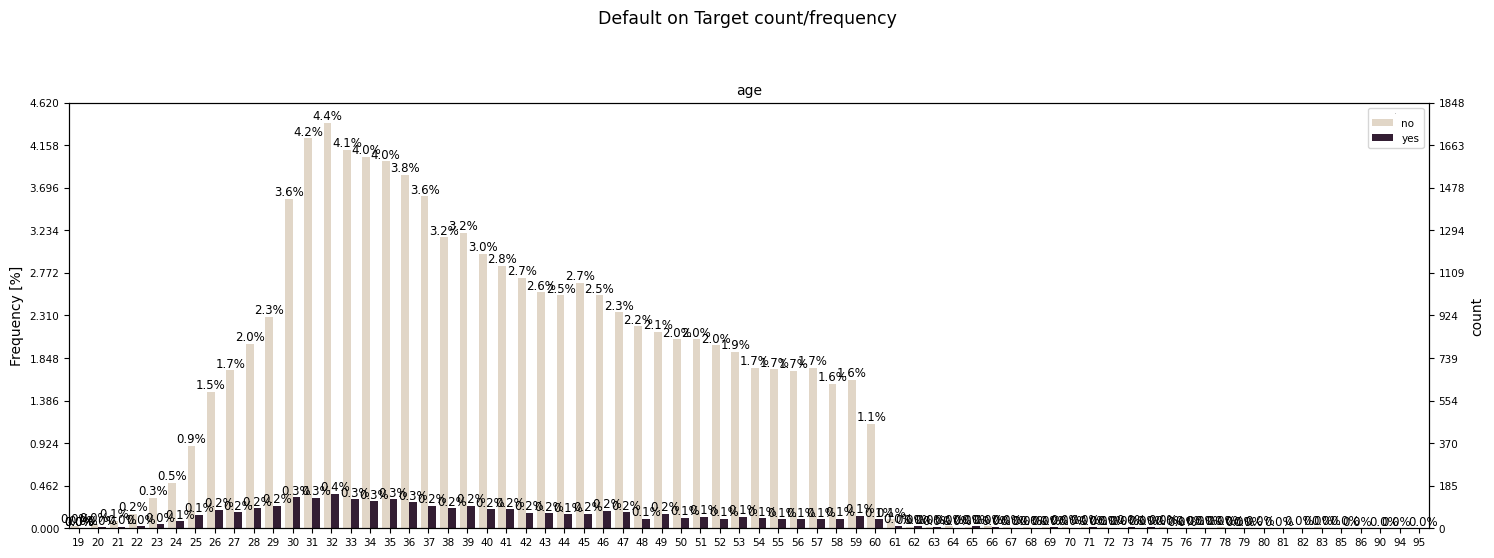

In [12]:
plot("count", df, 'age', fig_title="Default on Target count/frequency",
     rotate_label=False, add_args={"hue":"y", "palette":'ch:.25'}, fontsizes=5);

THE ABOVE SHOWS THOSE IN THEIR 30s RESPONDED MORE POSITIVELY THAN OTHERS

**JOB**

                  N      %
job                       
blue-collar    9383  23.46
management     8166  20.42
technician     6852  17.13
admin          4483  11.21
services       3910   9.78
retired        1437   3.59
self-employed  1414   3.54
entrepreneur   1405   3.51
unemployed     1104   2.76
housemaid      1087   2.72
student         524   1.31
unknown         235   0.59


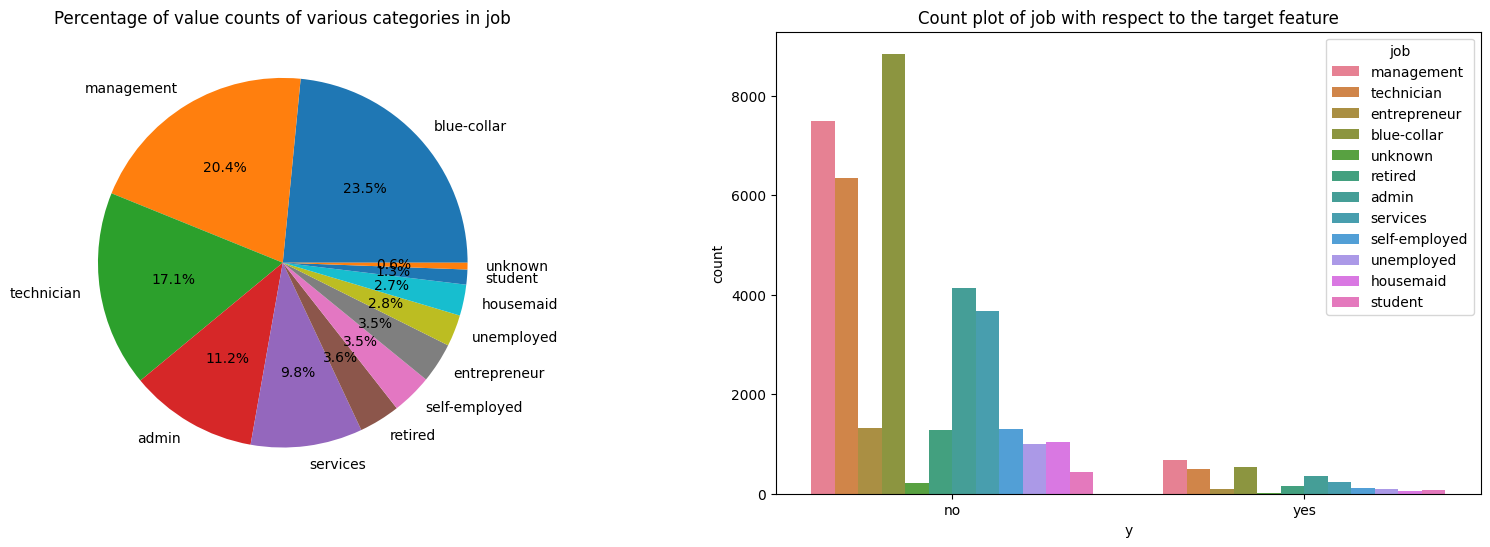

In [13]:
print(value_counts_percentage(df, 'job'))
#VISUALIZING THROUGH PIE CHART AND CATEGORIZED COUNTPLOT
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))
ax1 = axes[0]
ax2 = axes[1]
sns.countplot(x = 'y', hue = 'job', data = df, ax = ax2)
ax2.set_title('Count plot of job with respect to the target feature')
ax1.pie(x = df['job'].value_counts(normalize=True), labels = df['job'].value_counts().index,\
       autopct='%1.1f%%', radius = 1)
ax1.set_title('Percentage of value counts of various categories in job')
plt.show()

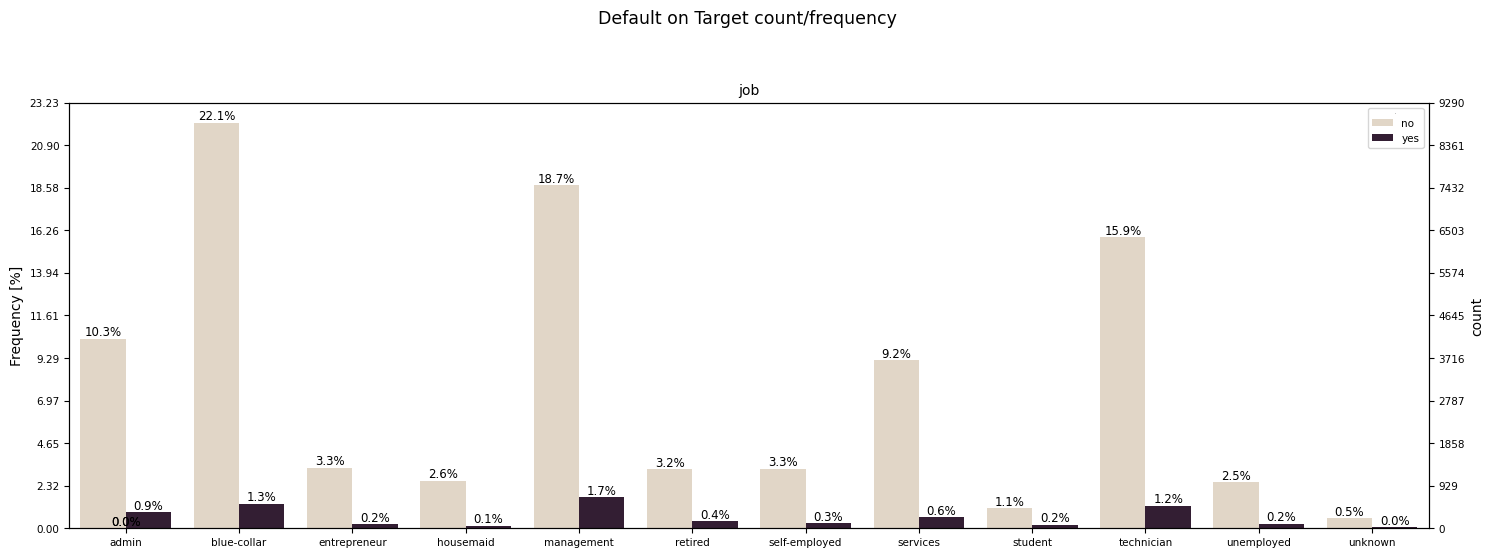

In [14]:
plot("count", df, 'job', fig_title="Default on Target count/frequency",
     rotate_label=False, add_args={"hue":"y", "palette":'ch:.25'}, fontsizes=5);

BLUE-COLLAR, MANAGEMENT AND TECHNICIANS ACCOUNT FOR MORE THAN 50% OF POSITIVE RESPONSES

**MARITAL**

              N      %
marital               
married   24386  60.96
single    10889  27.22
divorced   4725  11.81


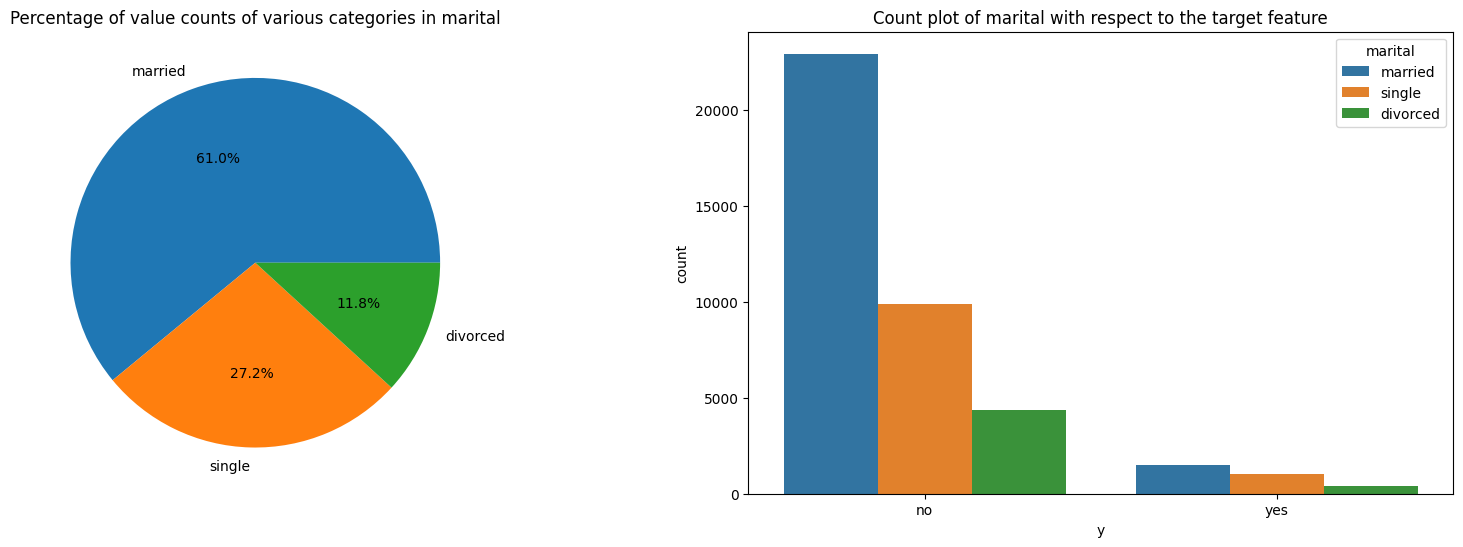

In [15]:
print(value_counts_percentage(df, 'marital'))
#VISUALIZING THROUGH PIE CHART AND CATEGORIZED COUNTPLOT
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))
ax1 = axes[0]
ax2 = axes[1]
sns.countplot(x = 'y', hue = 'marital', data = df, ax = ax2)
ax2.set_title('Count plot of marital with respect to the target feature')
ax1.pie(x = df['marital'].value_counts(normalize=True), labels = df['marital'].value_counts().index,\
       autopct='%1.1f%%', radius = 1)
ax1.set_title('Percentage of value counts of various categories in marital')
plt.show()

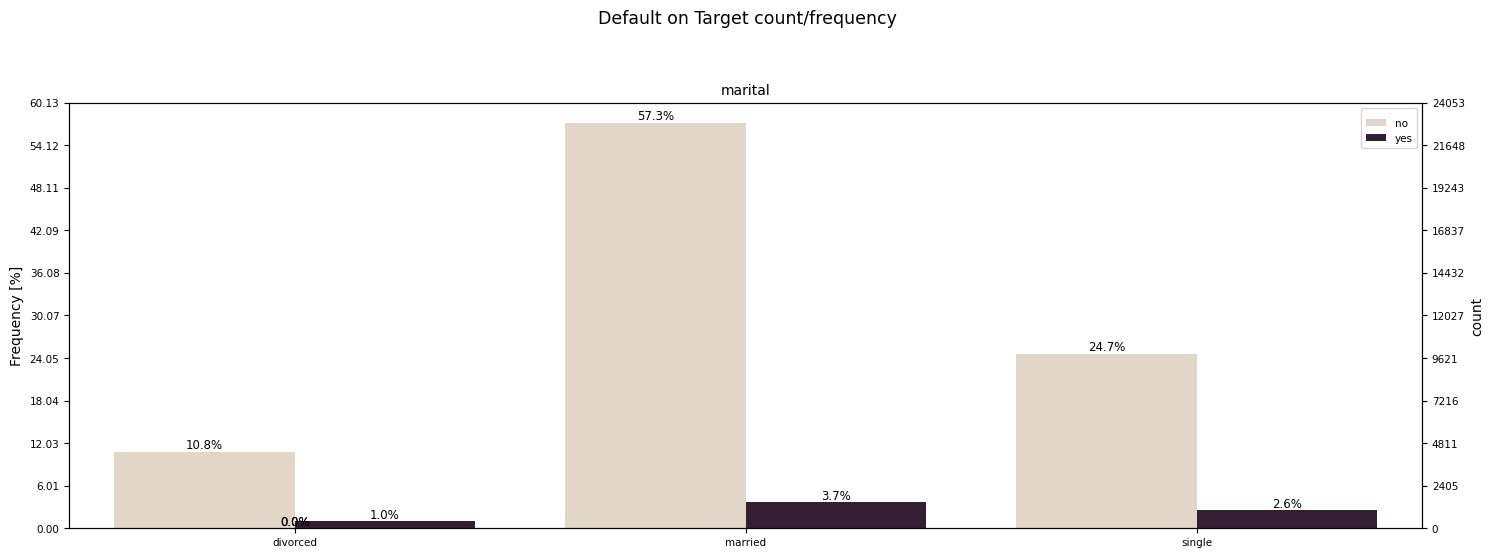

In [16]:
plot("count", df, 'marital', fig_title="Default on Target count/frequency",
     rotate_label=False, add_args={"hue":"y", "palette":'ch:.25'}, fontsizes=5);

MARRIED PEOPLE ACCOUNT FOR OVER 50%, WITH SINGLES ALMOST 90%

**EDUCATION**

               N      %
education              
secondary  20993  52.48
tertiary   11206  28.02
primary     6270  15.68
unknown     1531   3.83


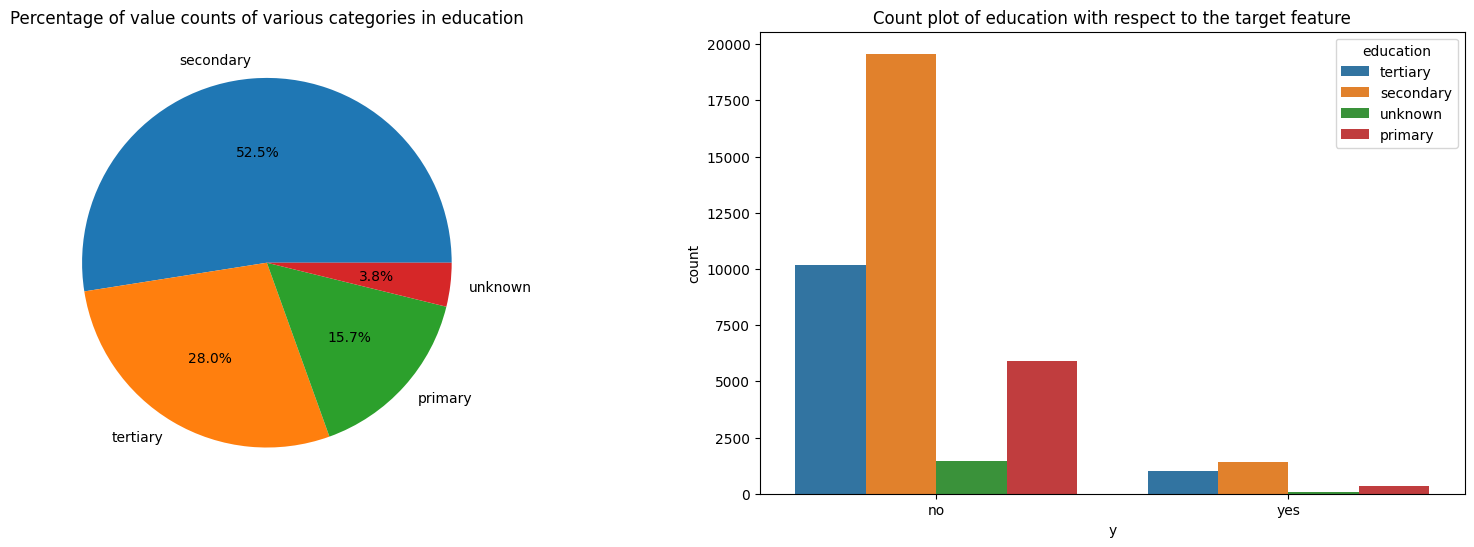

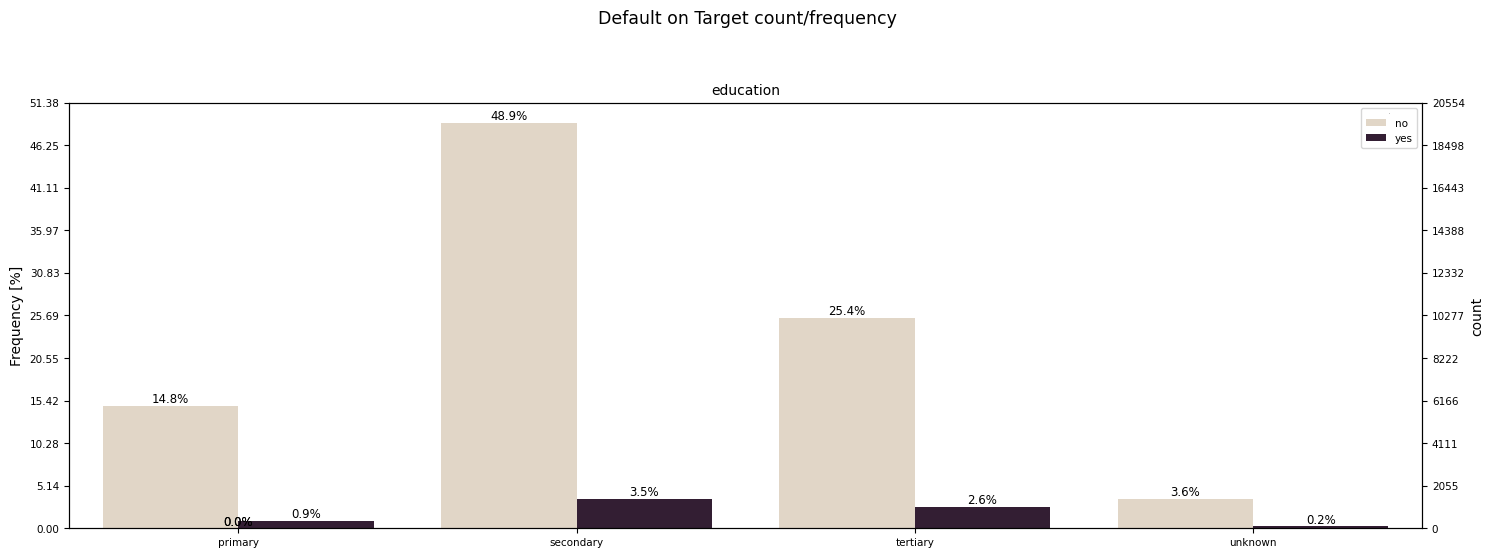

In [17]:
print(value_counts_percentage(df, 'education'))
#VISUALIZING THROUGH PIE CHART AND CATEGORIZED COUNTPLOT
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))
ax1 = axes[0]
ax2 = axes[1]
sns.countplot(x = 'y', hue = 'education', data = df, ax = ax2)
ax2.set_title('Count plot of education with respect to the target feature')
ax1.pie(x = df['education'].value_counts(normalize=True), labels = df['education'].value_counts().index,\
       autopct='%1.1f%%', radius = 1)
ax1.set_title('Percentage of value counts of various categories in education')
plt.show()

plot("count", df, 'education', fig_title="Default on Target count/frequency", rotate_label=False, add_args={"hue":"y", "palette":'ch:.25'}, fontsizes=5);

SECONDARY SCHOOLED RESPONDENTS ACCOUNT FOR OVER 50% OF POSITIVE FEEDBACKS

**DEFAULT**

             N      %
default              
no       39191  97.98
yes        809   2.02


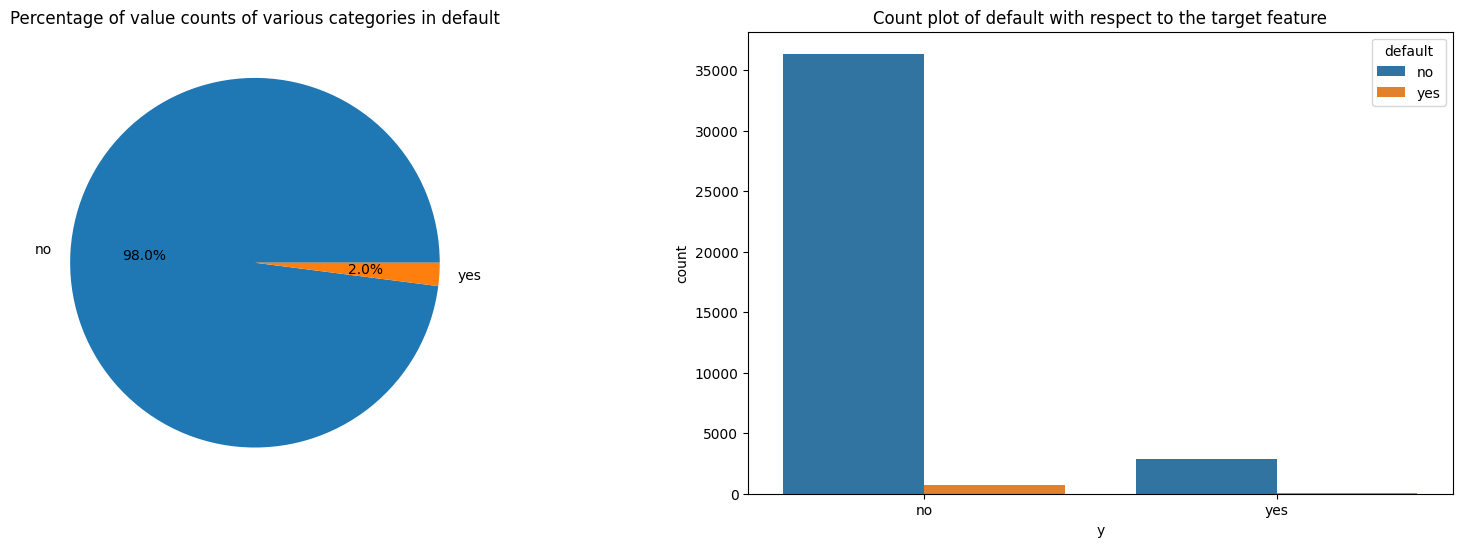

In [18]:
print(value_counts_percentage(df, 'default'))
#VISUALIZING THROUGH PIE CHART AND CATEGORIZED COUNTPLOT
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))
ax1 = axes[0]
ax2 = axes[1]
sns.countplot(x = 'y', hue = 'default', data = df, ax = ax2)
ax2.set_title('Count plot of default with respect to the target feature')
ax1.pie(x = df['default'].value_counts(normalize=True), labels = df['default'].value_counts().index,\
       autopct='%1.1f%%', radius = 1)
ax1.set_title('Percentage of value counts of various categories in default')
plt.show()

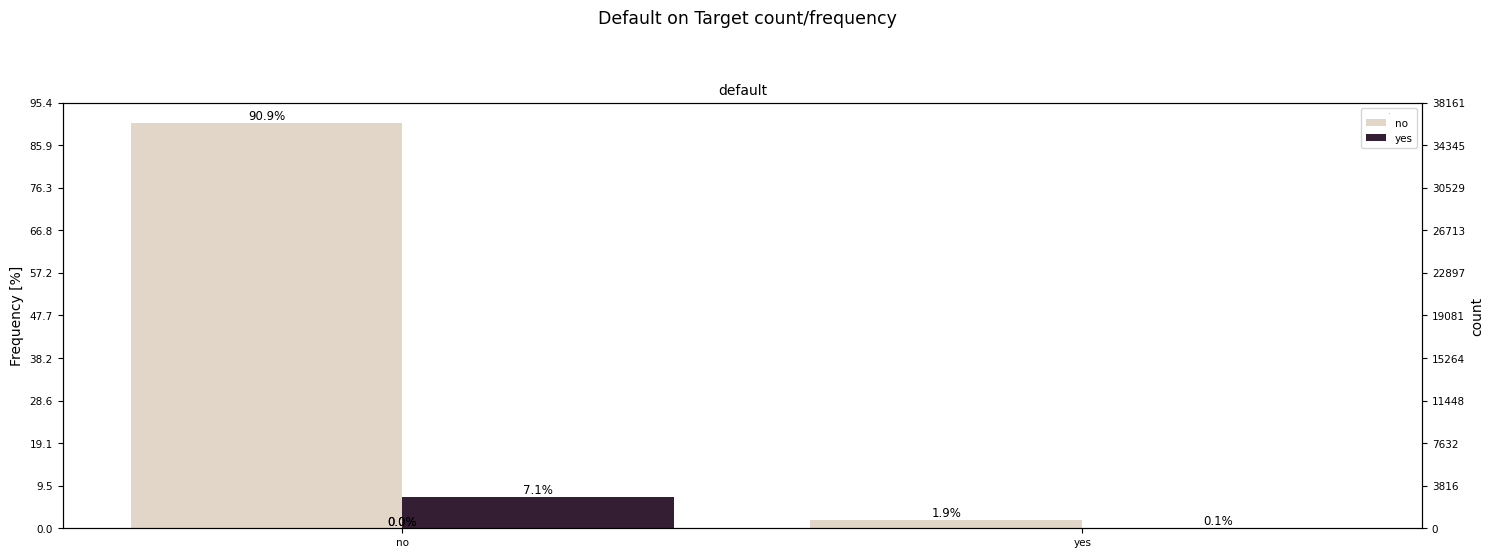

In [19]:
plot("count", df, 'default', fig_title="Default on Target count/frequency",
     rotate_label=False, add_args={"hue":"y", "palette":'ch:.25'}, fontsizes=5);

NON DEFAULTERS ACCOUNT FOR OVER 90% OF POSITIVE RESPONSE

**HOUSING**

             N      %
housing              
yes      24031  60.08
no       15969  39.92


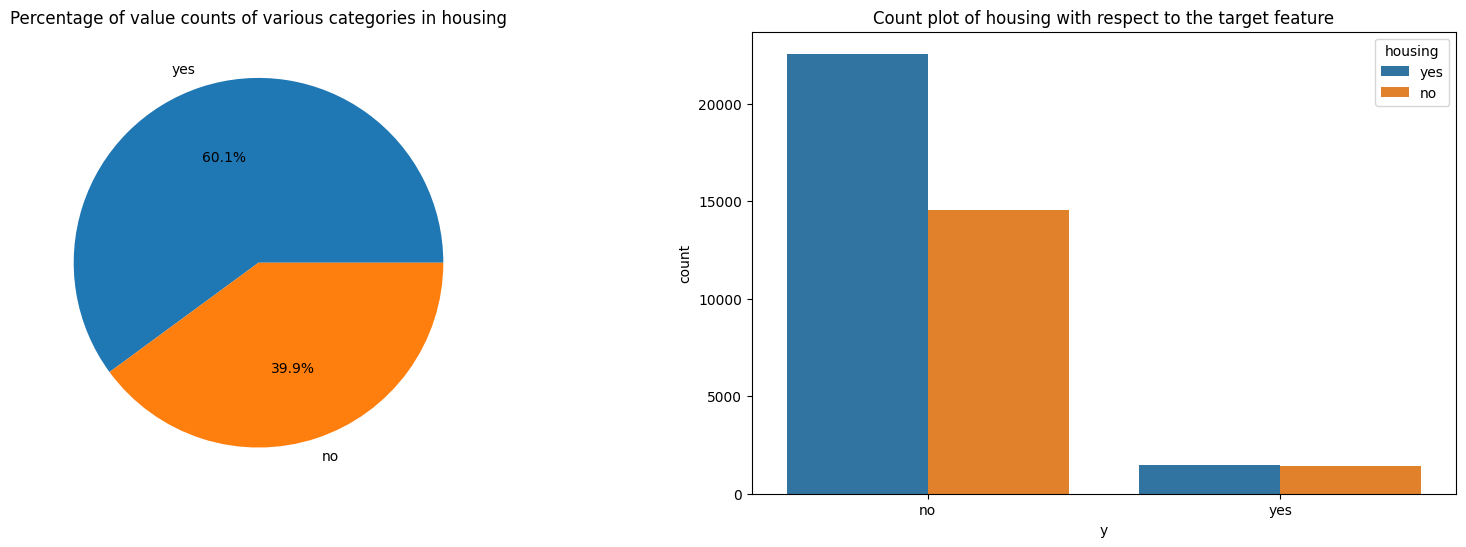

In [20]:
print(value_counts_percentage(df, 'housing'))
#VISUALIZING THROUGH PIE CHART AND CATEGORIZED COUNTPLOT
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))
ax1 = axes[0]
ax2 = axes[1]
sns.countplot(x = 'y', hue = 'housing', data = df, ax = ax2)
ax2.set_title('Count plot of housing with respect to the target feature')
ax1.pie(x = df['housing'].value_counts(normalize=True), labels = df['housing'].value_counts().index,\
       autopct='%1.1f%%', radius = 1)
ax1.set_title('Percentage of value counts of various categories in housing')
plt.show()

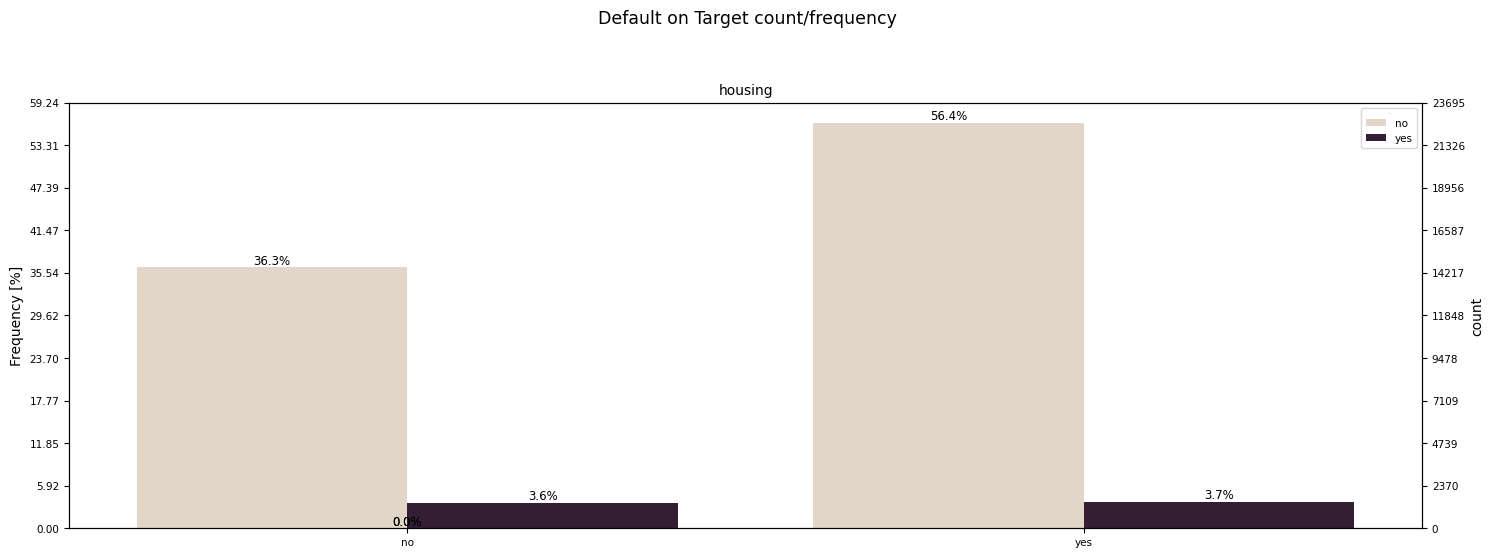

In [21]:
plot("count", df, 'housing', fig_title="Default on Target count/frequency",
     rotate_label=False, add_args={"hue":"y", "palette":'ch:.25'}, fontsizes=5);

HOUSING ACQUISITION MADE NO SIGNIFICANT DIFFERENCE IN RESPONSES

**LOAN**

          N      %
loan              
no    33070  82.68
yes    6930  17.32


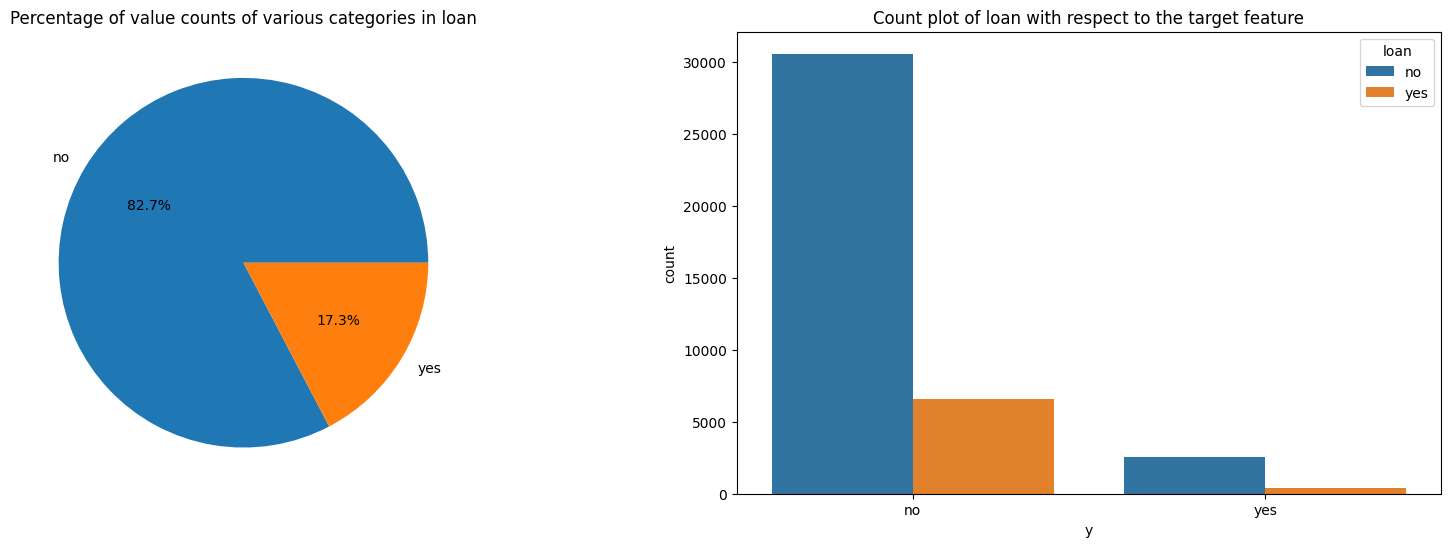

In [22]:
print(value_counts_percentage(df, 'loan'))
#VISUALIZING THROUGH PIE CHART AND CATEGORIZED COUNTPLOT
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))
ax1 = axes[0]
ax2 = axes[1]
sns.countplot(x = 'y', hue = 'loan', data = df, ax = ax2)
ax2.set_title('Count plot of loan with respect to the target feature')
ax1.pie(x = df['loan'].value_counts(normalize=True), labels = df['loan'].value_counts().index,\
       autopct='%1.1f%%', radius = 1)
ax1.set_title('Percentage of value counts of various categories in loan')
plt.show()

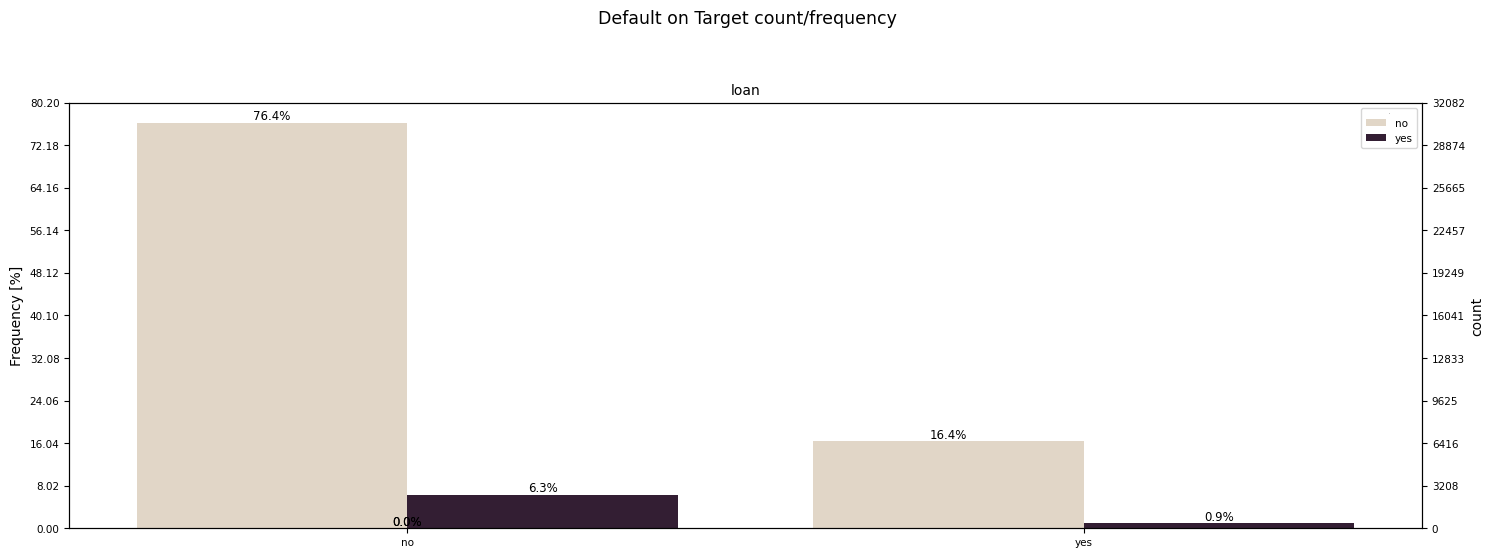

In [23]:
plot("count", df, 'loan', fig_title="Default on Target count/frequency",
     rotate_label=False, add_args={"hue":"y", "palette":'ch:.25'}, fontsizes=5);

**CONTACT**

               N      %
contact                
cellular   24914  62.28
unknown    12765  31.91
telephone   2321   5.80


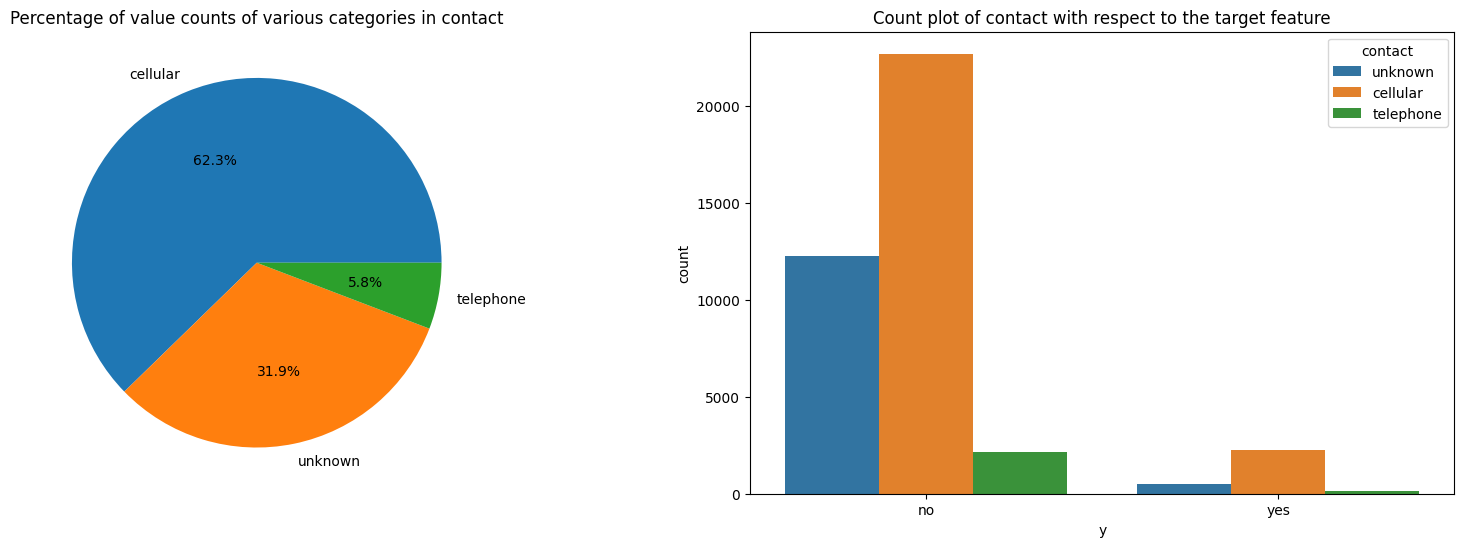

In [24]:
print(value_counts_percentage(df, 'contact'))
#VISUALIZING THROUGH PIE CHART AND CATEGORIZED COUNTPLOT
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))
ax1 = axes[0]
ax2 = axes[1]
sns.countplot(x = 'y', hue = 'contact', data = df, ax = ax2)
ax2.set_title('Count plot of contact with respect to the target feature')
ax1.pie(x = df['contact'].value_counts(normalize=True), labels = df['contact'].value_counts().index,\
       autopct='%1.1f%%', radius = 1)
ax1.set_title('Percentage of value counts of various categories in contact')
plt.show()

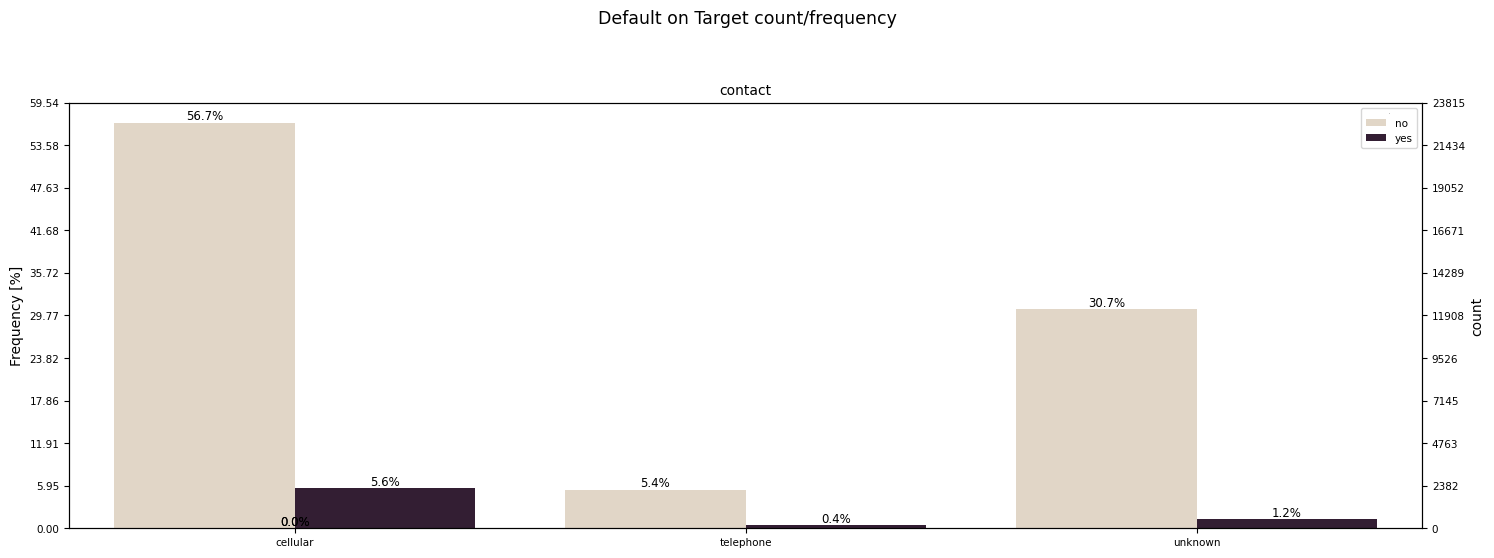

In [25]:
plot("count", df, 'contact', fig_title="Default on Target count/frequency",
     rotate_label=False, add_args={"hue":"y", "palette":'ch:.25'}, fontsizes=5);

CELLULAR RESPONSES ARE MORE POSITVE

**MONTH**

           N      %
month              
may    13532  33.83
jul     6380  15.95
aug     5215  13.04
jun     4734  11.84
nov     3598   9.00
apr     2718   6.80
feb     2296   5.74
jan     1176   2.94
mar      258   0.64
oct       80   0.20
dec       13   0.03


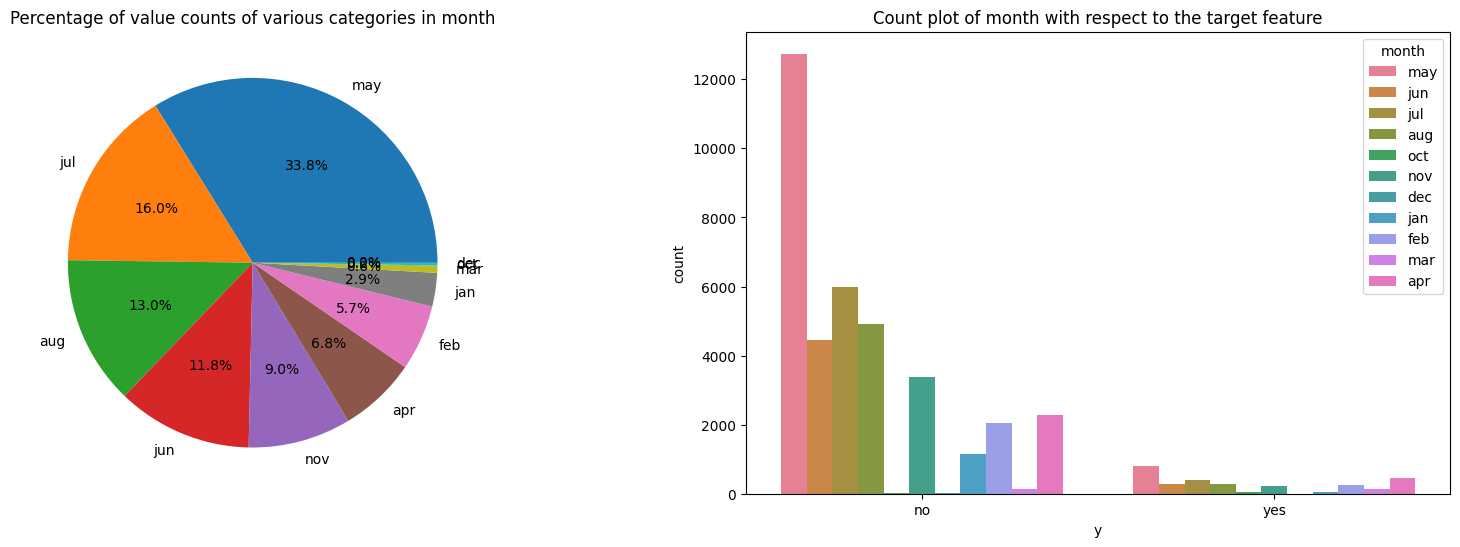

In [26]:
print(value_counts_percentage(df, 'month'))
#VISUALIZING THROUGH PIE CHART AND CATEGORIZED COUNTPLOT
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))
ax1 = axes[0]
ax2 = axes[1]
sns.countplot(x = 'y', hue = 'month', data = df, ax = ax2)
ax2.set_title('Count plot of month with respect to the target feature')
ax1.pie(x = df['month'].value_counts(normalize=True), labels = df['month'].value_counts().index,\
       autopct='%1.1f%%', radius = 1)
ax1.set_title('Percentage of value counts of various categories in month')
plt.show()

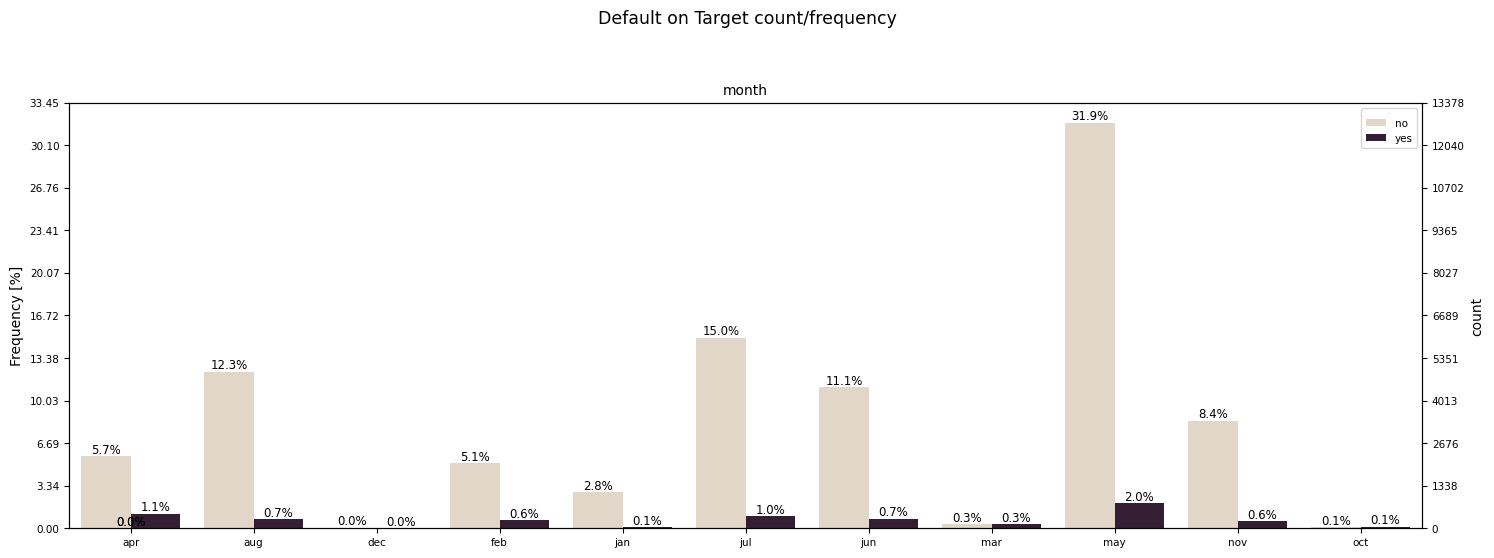

In [27]:
plot("count", df, 'month', fig_title="Default on Target count/frequency",
     rotate_label=False, add_args={"hue":"y", "palette":'ch:.25'}, fontsizes=5);

MAY CALLS AND POSITIVE RESPONSE IS SIGNIFICANT ACCOUNTING FOR ONE-THIRD OF TOTAL CALLS. WITH JUNE, JULY AND AUGUST IT WILL RISE TO MORE THAN TWO-THIRD. TAX MONTH AND TAX RETURN IS A FACTOR HERE?

**DURATION**

In [28]:
value_counts_percentage(df, 'duration')

,N,%
duration,,
124,172,0.43
90,166,0.42
114,162,0.40
89,160,0.40
119,159,0.40
...,...,...
1669,1,0.00
1397,1,0.00
1310,1,0.00


**CAMPAIGN**

In [29]:
value_counts_percentage(df, 'campaign')

,N,%
campaign,,
1,14718,36.80
2,11153,27.88
3,4970,12.42
4,3297,8.24
5,1642,4.11
6,1228,3.07
7,699,1.75
8,526,1.32
9,318,0.80


**ANALYZING THE TARGET - 1 -Yes  0-No**

Value Count of the target Variable

In [30]:
value_counts_percentage(df, 'y')

,N,%
y,,
no,37104,92.76
yes,2896,7.24


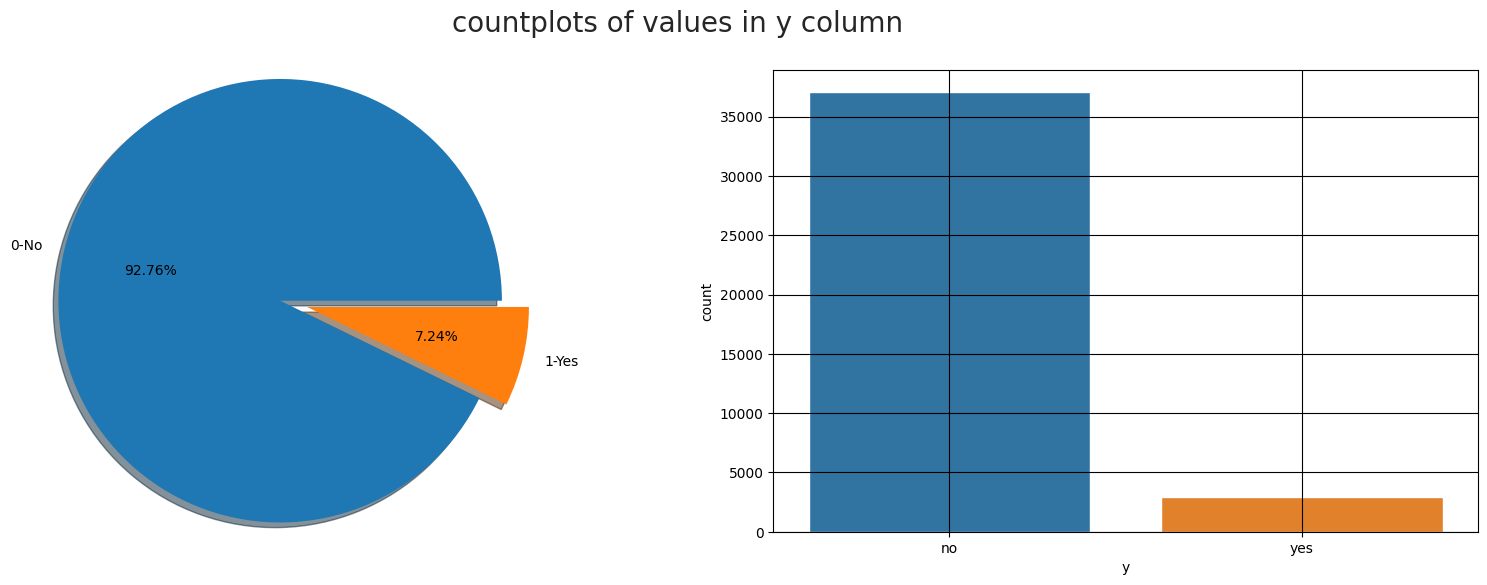

In [31]:
#Visualizing the target y column
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))
ax1 = axes[0]
ax2 = axes[1]
ax1.pie(df['y'].value_counts(normalize=True), explode = [0, 0.15], autopct = '%1.2f%%', labels = ['0-No', '1-Yes'],\
        radius=1.2, shadow = True)
sns.set_style(style = 'dark')
#sns.countplot(x = 'y', hue = 'month', data = df, ax = ax2)

sns.countplot(x = 'y', hue='y', data = df)
fig.suptitle('countplots of values in y column', fontsize = 20)
ax2.grid(True, color='black')
plt.show()

The target variable 'y' is highly skewed in favour of 'no'

I WILL DROP COLUMNS THAT GOES WITH CALLS BEEN MADE. THE IDEA IS TO AASSUME THE CALLS HAVE NOT BEEN MADE, THIS WILL ENABLE ME TO WORK WITH THE DEMOGRAPHIC PART OF THE DATA. TO KNOW THOSE THAT OUGHT TO BE CALLED. THIS WILL HELP TO ELIMINATE RESOURCES WASTAGE.

In [32]:
df_b4call=df.drop(['contact','day', 'month', 'duration', 'campaign'], axis=1)

LOGISTIC REGRESSION ACCURACY OF 92.76% IS STILL THE BEST, HOWEVER THE CONFUSION METRICS SHOWS IT IS BIASED AS SEEN ABOVE

I AM USING THE TOP THREE MODELS SELECTED FROM PYCARET, WHICH IS LOGISTIC REGRESSION, RIDGE REGRESSION AND DUMMY CLASSIFIER.

IMPORT LABEL ENCODER AND ENCODE THE FEATURES

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# Fit and transform the selected column
df_b4call["job"] = label_encoder.fit_transform(df_b4call["job"])
df_b4call["marital"] = label_encoder.fit_transform(df_b4call["marital"])
df_b4call["education"] = label_encoder.fit_transform(df_b4call["education"])
df_b4call["default"] = label_encoder.fit_transform(df_b4call["default"])
df_b4call["housing"] = label_encoder.fit_transform(df_b4call["housing"])
df_b4call["loan"] = label_encoder.fit_transform(df_b4call["loan"])
df_b4call["y"] = label_encoder.fit_transform(df_b4call["y"])

In [ ]:
df_b4call.head()

,age,job,marital,education,default,balance,housing,loan,y
0,58,4,1,2,0,2143,1,0,0
1,44,9,2,1,0,29,1,0,0
2,33,2,1,1,0,2,1,1,0
3,47,1,1,3,0,1506,1,0,0
4,33,11,2,3,0,1,0,0,0


In [ ]:
#Preparing for test and Train Data
X = df_b4call.iloc[:,:-1]
y = df_b4call.iloc[:,-1]

USING THE 3 MODELS

In [ ]:
!pip install scikit-optimize

USING GRIDSEARCH


--- Best LogisticRegression by Accuracy ---
Seed                                                         1077
Best Hyperparameters    {'C': 0.01, 'max_iter': 100, 'tol': 0.01}
Accuracy                                                     0.57
Recall (Class 0)                                             0.57
Recall (Class 1)                                             0.54
Name: 4, dtype: object


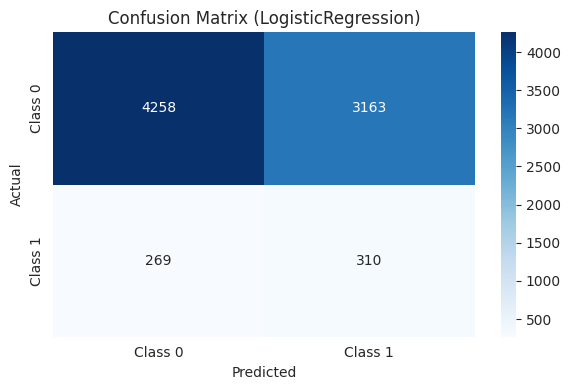


Classification Report - LogisticRegression:

              precision    recall  f1-score   support

           0       0.94      0.57      0.71      7421
           1       0.09      0.54      0.15       579

    accuracy                           0.57      8000
   macro avg       0.51      0.55      0.43      8000
weighted avg       0.88      0.57      0.67      8000

{'C': 0.01, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.01, 'verbose': 0, 'warm_start': False}

--- Best RidgeClassifier by Accuracy ---
Seed                               1564
Best Hyperparameters    {'alpha': 0.01}
Accuracy                            0.6
Recall (Class 0)                    0.6
Recall (Class 1)                   0.52
Name: 0, dtype: object


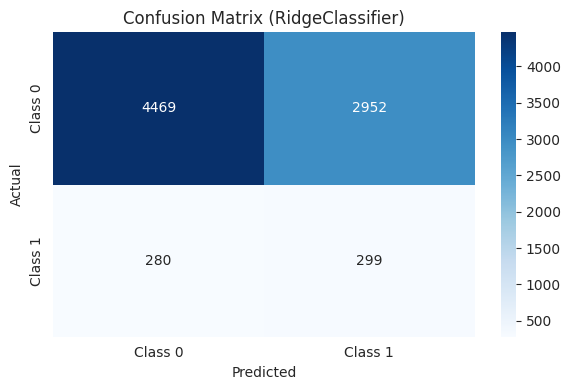


Classification Report - RidgeClassifier:

              precision    recall  f1-score   support

           0       0.94      0.60      0.73      7421
           1       0.09      0.52      0.16       579

    accuracy                           0.60      8000
   macro avg       0.52      0.56      0.45      8000
weighted avg       0.88      0.60      0.69      8000

{'alpha': 0.01, 'class_weight': 'balanced', 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}

--- Best DummyClassifier by Accuracy ---
Seed                                       8871
Best Hyperparameters    {'strategy': 'uniform'}
Accuracy                                   0.51
Recall (Class 0)                           0.51
Recall (Class 1)                           0.51
Name: 0, dtype: object


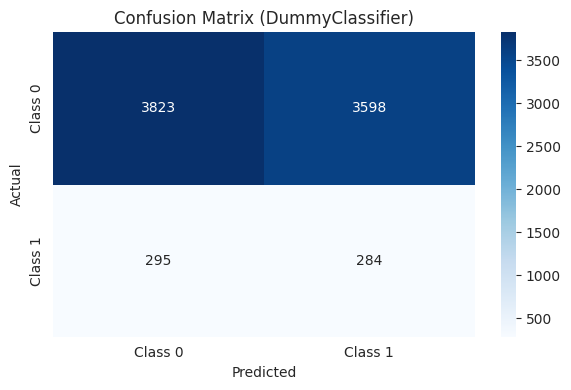


Classification Report - DummyClassifier:

              precision    recall  f1-score   support

           0       0.93      0.52      0.66      7421
           1       0.07      0.49      0.13       579

    accuracy                           0.51      8000
   macro avg       0.50      0.50      0.39      8000
weighted avg       0.87      0.51      0.62      8000

{'constant': None, 'random_state': None, 'strategy': 'uniform'}


In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    accuracy_score, recall_score, confusion_matrix,
    classification_report, make_scorer
)
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

# ---------- DEFINE: Fixed 20 Random Seeds ----------
random.seed()
common_seeds = random.sample(range(1000, 9999), 20)

# ---------- Explicit Grid Search Spaces ----------
param_spaces = {
    "LogisticRegression": {
        "C": [0.01, 0.1, 1, 10],
        "max_iter": [100, 200, 300],
        "tol": [1e-4, 1e-3, 1e-2]
    },
    "RidgeClassifier": {
        "alpha": [0.01, 0.1, 1, 10]
    },
    "DummyClassifier": {
        "strategy": ["most_frequent", "stratified", "uniform", "prior"]
    }
}

# ---------- Model Config ----------
models = {
    "LogisticRegression": LogisticRegression(solver="lbfgs", class_weight="balanced"),
    "RidgeClassifier": RidgeClassifier(class_weight="balanced"),
    "DummyClassifier": DummyClassifier()
}

# ---------- Collect All Results ----------
all_results = {
    "LogisticRegression": [],
    "RidgeClassifier": [],
    "DummyClassifier": []
}

# ---------- Iterate Through Seeds ----------
for seed in common_seeds:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)

    for model_name, model in models.items():
        search_space = param_spaces[model_name]

        opt = GridSearchCV(
            model,
            search_space,
            scoring=make_scorer(recall_score, pos_label=1),
            cv=5,
            n_jobs=-1
        )

        opt.fit(X_train, y_train)
        best_model = opt.best_estimator_
        y_pred = best_model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        recall_0 = recall_score(y_test, y_pred, pos_label=0)
        recall_1 = recall_score(y_test, y_pred, pos_label=1)

        if recall_0 > 0.5 and recall_1 > 0.5:
            all_results[model_name].append({
                "Seed": seed,
                "Best Hyperparameters": opt.best_params_,
                "Accuracy": round(accuracy, 2),
                "Recall (Class 0)": round(recall_0, 2),
                "Recall (Class 1)": round(recall_1, 2)
            })

# ---------- Final Evaluation per Model ----------
for model_name in models.keys():
    df_3 = pd.DataFrame(all_results[model_name])

    if not df_3.empty:
        best_row = df_3.sort_values(by="Accuracy", ascending=False).iloc[0]
        best_seed = best_row["Seed"]
        print(f"\n--- Best {model_name} by Accuracy ---\n{best_row}")

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=best_seed, stratify=y
        )
        X_train = scale.fit_transform(X_train)
        X_test = scale.transform(X_test)

        opt = GridSearchCV(
            models[model_name],
            param_spaces[model_name],
            scoring=make_scorer(recall_score, pos_label=1),
            cv=5,
            n_jobs=-1
        )
        opt.fit(X_train, y_train)
        best_model = opt.best_estimator_
        y_pred = best_model.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=["Class 0", "Class 1"],
                    yticklabels=["Class 0", "Class 1"])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"Confusion Matrix ({model_name})")
        plt.tight_layout()
        plt.show()

        print(f"\nClassification Report - {model_name}:\n")
        print(classification_report(y_test, y_pred))
        print(best_model.get_params())
    else:
        print(f"\nNo valid results for {model_name} where both recall scores exceeded 0.5.")


In [ ]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1757, stratify=y)

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

Accuracy: 0.603375
Recall (Class 0): 0.6092170866460046
Recall (Class 1): 0.5284974093264249


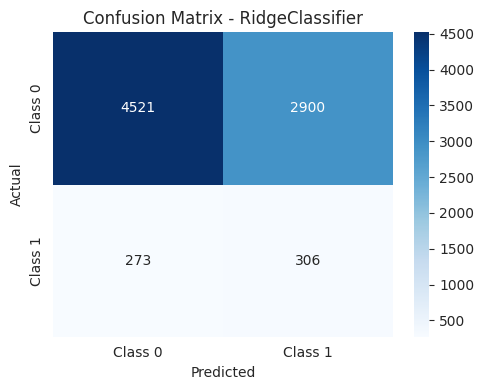


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.61      0.74      7421
           1       0.10      0.53      0.16       579

    accuracy                           0.60      8000
   macro avg       0.52      0.57      0.45      8000
weighted avg       0.88      0.60      0.70      8000



In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define and train the model
model_RC = RidgeClassifier(
    alpha= 0.01, class_weight= 'balanced', copy_X= True, fit_intercept= True,
    max_iter= None, positive= False, random_state= None, solver= 'auto', tol= 0.0001
)

model_RC.fit(X_train, y_train)
y_pred = model_RC.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall (Class 0):", recall_score(y_test, y_pred, pos_label=0))
print("Recall (Class 1):", recall_score(y_test, y_pred, pos_label=1))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - RidgeClassifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

THE HIGHEST ACCURACY IS FROM RIDGECLASSIFIER WITH 60%, I WILL USE OPTUNA TO IMPROVE THE RESULTS IF POSSIBLE

FOR REPRODUCIBILITY SAKE, THE SEED USED ONWARD IS 6375

In [ ]:
!pip install optuna

OPTUNA AND LOGISTIC REGRESSION

[I 2025-04-25 09:15:51,869] A new study created in memory with name: no-name-5364d2a1-ad0a-49e4-96db-363e3b92fe5b
[I 2025-04-25 09:15:52,204] Trial 0 finished with value: 0.0 and parameters: {'C': 6.145745111137796, 'penalty': 'l1', 'solver': 'liblinear', 'class_weight': None}. Best is trial 0 with value: 0.0.
[I 2025-04-25 09:15:53,275] Trial 1 finished with value: 0.0 and parameters: {'C': 0.19001007472833145, 'penalty': 'l1', 'solver': 'saga', 'class_weight': None}. Best is trial 0 with value: 0.0.
[I 2025-04-25 09:15:55,426] Trial 2 finished with value: 0.0 and parameters: {'C': 5.665401009634207, 'penalty': 'elasticnet', 'solver': 'saga', 'class_weight': None, 'l1_ratio': 0.003946585466307662}. Best is trial 0 with value: 0.0.
[I 2025-04-25 09:15:55,436] Trial 3 finished with value: 0.0 and parameters: {'C': 0.00014798253173122354, 'penalty': 'l1', 'solver': 'lbfgs', 'class_weight': None}. Best is trial 0 with value: 0.0.
[I 2025-04-25 09:15:55,793] Trial 4 finished with value: 0.

Best Hyperparameters: {'C': 0.00032860705238740796, 'penalty': 'l2', 'solver': 'liblinear', 'class_weight': 'balanced'}

Test Recall (Class 0): 0.59
Test Recall (Class 1): 0.54
Test Accuracy: 0.59


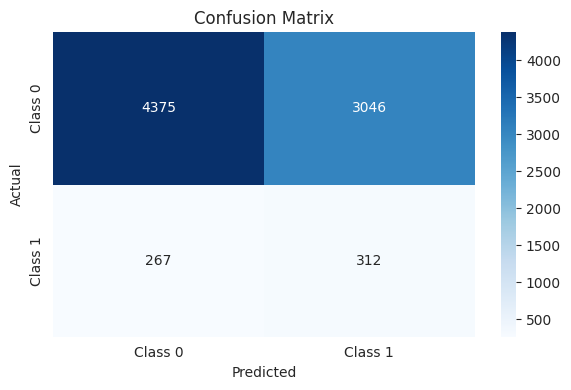


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.59      0.73      7421
           1       0.09      0.54      0.16       579

    accuracy                           0.59      8000
   macro avg       0.52      0.56      0.44      8000
weighted avg       0.88      0.59      0.68      8000



In [ ]:
import numpy as np
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, classification_report, make_scorer
from optuna.samplers import TPESampler

# Define the objective function for Optuna
def objective(trial):
    C = trial.suggest_loguniform("C", 1e-4, 10.0)
    penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet", None])
    solver = trial.suggest_categorical("solver", ["lbfgs", "saga", "liblinear"])
    class_weight = trial.suggest_categorical("class_weight", [None, "balanced"])

    if penalty == "elasticnet":
        l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0)
    else:
        l1_ratio = None

    # Incompatible combinations
    if solver == "lbfgs" and penalty in ["l1", "elasticnet"]:
        return 0
    if solver == "liblinear" and penalty in ["elasticnet", None]:
        return 0

    try:
        model = LogisticRegression(
            C=C,
            penalty=penalty,
            solver=solver,
            class_weight=class_weight,
            l1_ratio=l1_ratio if penalty == "elasticnet" else None,
            max_iter=100,
            verbose=0
            )

        # Use cross_val_predict to get predicted values for recall(0) and recall(1)
        y_pred = cross_val_predict(model, X_train, y_train, cv=5, method='predict')
        recall_0 = recall_score(y_train, y_pred, pos_label=0)
        recall_1 = recall_score(y_train, y_pred, pos_label=1)

        # Only accept models where both recalls are above threshold
        if recall_0 > 0.5 and recall_1 > 0.5:
            return recall_1  # We still use recall(1) for optimization
        else:
            return 0  # Penalize bad models

    except:
        return 0  # Handle failed models

# Create Optuna study
study = optuna.create_study(direction="maximize", sampler=TPESampler(seed=5803))
study.optimize(objective, n_trials=20)

# Get best parameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train final model
best_model = LogisticRegression(**best_params, max_iter=100)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Final evaluation
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Recall (Class 0): {recall_0:.2f}")
print(f"Test Recall (Class 1): {recall_1:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

OPTUNA AND RIDGE REGRESSION

[I 2025-04-25 09:16:03,522] A new study created in memory with name: no-name-268755f1-331e-4dda-a265-5e405f92fc79
[I 2025-04-25 09:16:03,619] Trial 0 finished with value: 0.0 and parameters: {'alpha': 47.51024140591136, 'class_weight': None}. Best is trial 0 with value: 0.0.
[I 2025-04-25 09:16:03,800] Trial 1 finished with value: 0.5399223133362107 and parameters: {'alpha': 0.0006131848891553363, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.5399223133362107.
[I 2025-04-25 09:16:03,897] Trial 2 finished with value: 0.0 and parameters: {'alpha': 0.00023295498225885014, 'class_weight': None}. Best is trial 1 with value: 0.5399223133362107.
[I 2025-04-25 09:16:03,995] Trial 3 finished with value: 0.0 and parameters: {'alpha': 0.00032562950991584335, 'class_weight': None}. Best is trial 1 with value: 0.5399223133362107.
[I 2025-04-25 09:16:04,131] Trial 4 finished with value: 0.5399223133362107 and parameters: {'alpha': 0.0018038962107542157, 'class_weight': 'balanced'}. Best

Best Hyperparameters: {'alpha': 0.0006131848891553363, 'class_weight': 'balanced'}

Test Recall (Class 0): 0.61
Test Recall (Class 1): 0.53
Test Accuracy: 0.6034


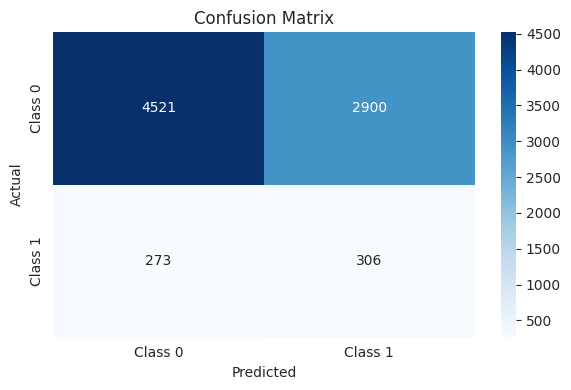


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.61      0.74      7421
           1       0.10      0.53      0.16       579

    accuracy                           0.60      8000
   macro avg       0.52      0.57      0.45      8000
weighted avg       0.88      0.60      0.70      8000



In [ ]:
import numpy as np
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, classification_report
from optuna.samplers import TPESampler

# Define the objective function for Optuna
def objective(trial):
    alpha = trial.suggest_loguniform("alpha", 1e-4, 100.0)
    class_weight = trial.suggest_categorical("class_weight", [None, "balanced"])

    model = RidgeClassifier(alpha=alpha, class_weight=class_weight)

    try:
        # Use cross_val_predict to get predictions and calculate both recall(0) and recall(1)
        y_pred = cross_val_predict(model, X_train, y_train, cv=5, method="predict")
        recall_0 = recall_score(y_train, y_pred, pos_label=0)
        recall_1 = recall_score(y_train, y_pred, pos_label=1)

        # Keep only models where both recalls are acceptable
        if recall_0 > 0.5 and recall_1 > 0.5:
            return recall_1  # Still optimizing for recall(1)
        else:
            return 0
    except:
        return 0  # Fallback in case of errors

# Create Optuna study
study = optuna.create_study(direction="maximize", sampler=TPESampler(seed=2824))
study.optimize(objective, n_trials=20)

# Get best parameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train final model with best parameters
best_model = RidgeClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate on test data
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Recall (Class 0): {recall_0:.2f}")
print(f"Test Recall (Class 1): {recall_1:.2f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

OPTUNA AND DUMMY CLASSIFIER

[I 2025-04-25 09:16:07,380] A new study created in memory with name: no-name-bbe79768-2508-4420-b249-37df76603920
[I 2025-04-25 09:16:07,476] Trial 0 finished with value: 0.0 and parameters: {'strategy': 'most_frequent'}. Best is trial 0 with value: 0.0.
[I 2025-04-25 09:16:07,536] Trial 1 finished with value: 0.0 and parameters: {'strategy': 'most_frequent'}. Best is trial 0 with value: 0.0.
[I 2025-04-25 09:16:07,599] Trial 2 finished with value: 0.0 and parameters: {'strategy': 'prior'}. Best is trial 0 with value: 0.0.
[I 2025-04-25 09:16:07,656] Trial 3 finished with value: 0.0 and parameters: {'strategy': 'most_frequent'}. Best is trial 0 with value: 0.0.
[I 2025-04-25 09:16:07,728] Trial 4 finished with value: 0.0 and parameters: {'strategy': 'stratified'}. Best is trial 0 with value: 0.0.
[I 2025-04-25 09:16:07,784] Trial 5 finished with value: 0.0 and parameters: {'strategy': 'stratified'}. Best is trial 0 with value: 0.0.
[I 2025-04-25 09:16:07,923] Trial 6 finished with valu

Best Hyperparameters: {'strategy': 'uniform'}

Test Recall (Class 0): 0.5022
Test Recall (Class 1): 0.4957
Test Accuracy: 0.5018


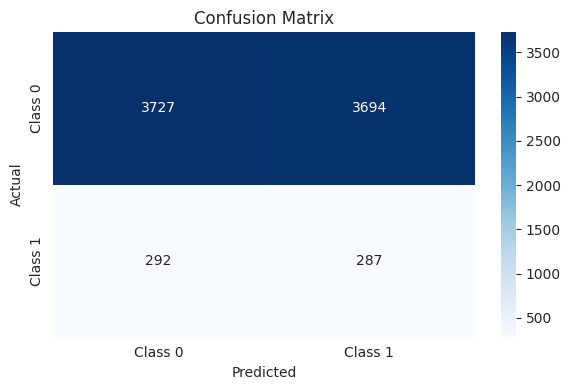


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.50      0.65      7421
           1       0.07      0.50      0.13       579

    accuracy                           0.50      8000
   macro avg       0.50      0.50      0.39      8000
weighted avg       0.87      0.50      0.61      8000



In [ ]:
import numpy as np
import pandas as pd
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, classification_report
from optuna.samplers import TPESampler

# Define the objective function for Optuna
def objective(trial):
    strategy = trial.suggest_categorical("strategy", ["most_frequent", "stratified", "uniform", "prior"])

    dummy_clf = DummyClassifier(strategy=strategy)

    try:
        # Predict across folds
        y_pred = cross_val_predict(dummy_clf, X_train, y_train, cv=5)
        recall_0 = recall_score(y_train, y_pred, pos_label=0)
        recall_1 = recall_score(y_train, y_pred, pos_label=1)

        # Only consider configurations where both recall scores > 0.5
        if recall_0 > 0.5 and recall_1 > 0.5:
            return recall_1,  # Optimize for recall(1)
            return recall_0
        else:
            return 0
    except:
        return 0  # Fallback in case of error

# Create and run the Optuna study
study = optuna.create_study(direction="maximize", sampler=TPESampler(seed=4582))
study.optimize(objective, n_trials=20)  # Increased trials to improve chances

# Get best parameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train final DummyClassifier
best_dummy_clf = DummyClassifier(strategy=best_params["strategy"])
best_dummy_clf.fit(X_train, y_train)
y_pred = best_dummy_clf.predict(X_test)

# Evaluate
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Recall (Class 0): {recall_0:.4f}")
print(f"Test Recall (Class 1): {recall_1:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

THE HIGHEST ACCURACY IS FROM RC WITH 61% FROM LOGISTICS REGRESSION

TO BALANCE THE VARIABLES OF THE OUTPUT VARIABLE, DIFFERENT TECHNIQUES WAS ENGAGED

**RANDOMUNDERSAMPLER**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from collections import Counter

# Before sampling class distribution
print("Before Undersampling:", Counter(y))

# Apply Random UnderSampler only to the training set
rus = RandomUnderSampler(random_state=best_seed)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

# After undersampling class distribution
print("After Undersampling:", Counter(y_train_res))

Before Undersampling: Counter({0: 37104, 1: 2896})
After Undersampling: Counter({0: 2317, 1: 2317})


LOGISTICREGRESSION WITH RANDOMUNDERSAMPLER

Seed 8871:
Recall (Class 0): 0.61
Recall (Class 1): 0.53
Accuracy: 0.5995
Best Hyperparameters: {'C': np.float64(26.389219029313622), 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

Confusion Matrix:


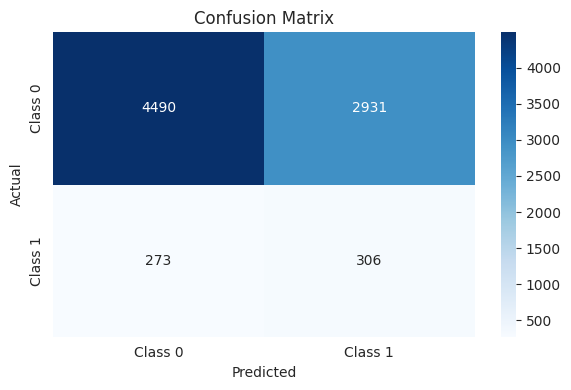

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix
from scipy.stats import uniform

# Set seed
#seed = 5803
#np.random.seed(seed)
#random.seed(seed)

# Define parameter distribution with class weights
param_dist = {
    'C': uniform(0.001, 100),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced', None]
}

# Define logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Use RandomizedSearchCV with recall (class 1) as the metric
random_search = RandomizedSearchCV(
    log_reg,
    param_distributions=param_dist,
    n_iter=20,  # increase for better search
    cv=5,
    scoring='recall',  # target recall for class 1
    n_jobs=-1,
    random_state=best_seed
)

# Fit the model
random_search.fit(X_train_res, y_train_res)

# Predict on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
accuracy = accuracy_score(y_test, y_pred)

# Display only if both recalls > 0.5
if recall_0 > 0.5 and recall_1 > 0.5:
    print(f"Seed {best_seed}:")
    print(f"Recall (Class 0): {recall_0:.2f}")
    print(f"Recall (Class 1): {recall_1:.2f}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Best Hyperparameters:", random_search.best_params_)

    # Show confusion matrix
    print("\nConfusion Matrix:")
    #print(confusion_matrix(y_test, y_pred))
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

else:
    print(f"Seed {seed}: Recall conditions not met — Class 0: {recall_0:.2f}, Class 1: {recall_1:.2f}")
    print(classification_report(y_test, y_pred))

RidgeClassifier with RandomUnderSampler

Best Hyperparameters: OrderedDict([('alpha', 6.255797683098656e-06)])
Best Cross-Validation Accuracy: 0.5693
Test Accuracy: 0.6008


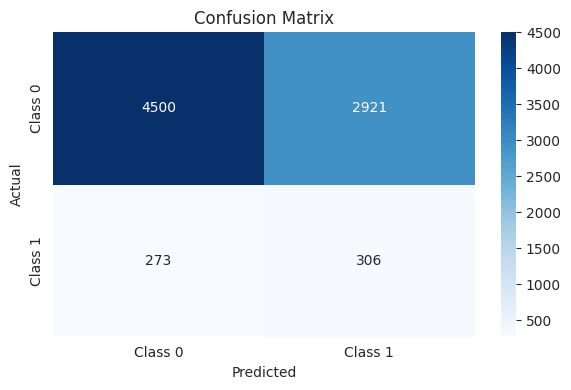


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.61      0.74      7421
           1       0.09      0.53      0.16       579

    accuracy                           0.60      8000
   macro avg       0.52      0.57      0.45      8000
weighted avg       0.88      0.60      0.70      8000



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from skopt import BayesSearchCV
from skopt.space import Real
from imblearn.under_sampling import RandomUnderSampler

# Define hyperparameter space for RidgeClassifier
param_space = {
    "alpha": Real(1e-6, 10, prior="log-uniform")  # Regularization strength
}

# Ridge Classifier
ridge_clf = RidgeClassifier(class_weight="balanced")

# Bayesian Optimization with accuracy as the scoring metric
opt = BayesSearchCV(
    ridge_clf,
    param_space,
    n_iter=50,
    scoring='accuracy',  # <-- now optimizing for accuracy
    cv=5,
    n_jobs=-1,
    random_state=best_seed,
    verbose=0
)

# Fit model
opt.fit(X_train_res, y_train_res)

# Results
best_params = opt.best_params_
best_score = opt.best_score_

print("Best Hyperparameters:", best_params)
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Evaluate on test data
best_model = opt.best_estimator_
y_pred = best_model.predict(X_test)

# Accuracy on test data
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {final_accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

DummyClassifier with RandomUnderSampler

Best Hyperparameters: OrderedDict([('strategy', 'stratified')])
Best Cross-Validation Accuracy: 0.5028
Test Accuracy: 0.5028

Confusion Matrix:
[[3712 3709]
 [ 269  310]]


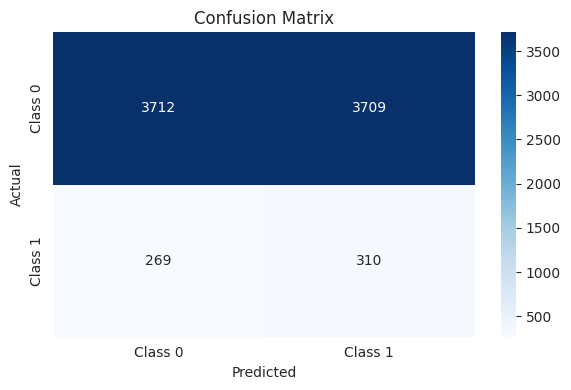


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.50      0.65      7421
           1       0.08      0.54      0.13       579

    accuracy                           0.50      8000
   macro avg       0.50      0.52      0.39      8000
weighted avg       0.87      0.50      0.61      8000



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler
from skopt import BayesSearchCV
from skopt.space import Categorical

# Define hyperparameter search space
param_space = {
    "strategy": Categorical(["most_frequent", "stratified", "uniform", "prior"])
}

# Initialize Dummy Classifier
dummy_clf = DummyClassifier()

# Perform Bayesian Optimization with accuracy as the scoring metric
opt = BayesSearchCV(
    dummy_clf,
    param_space,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=best_seed,
)

# Fit the model on undersampled training data
opt.fit(X_train_res, y_train_res)

# Get best parameters and best CV accuracy
best_params = opt.best_params_
best_score = opt.best_score_

print("Best Hyperparameters:", best_params)
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Evaluate on test data
best_model = opt.best_estimator_
y_pred = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {final_accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

LOGISTIC REGRESSION WITHOUT BALANCING IS STILL ACHEVES THE BEST RESULT

**USING SMOTETOMEK: COMPARE THE RESULTS**

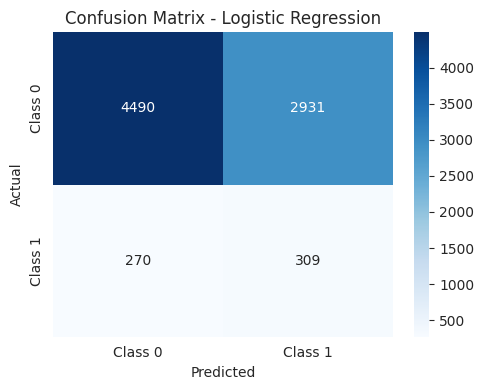

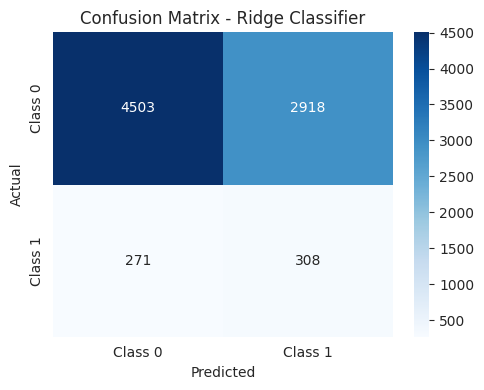

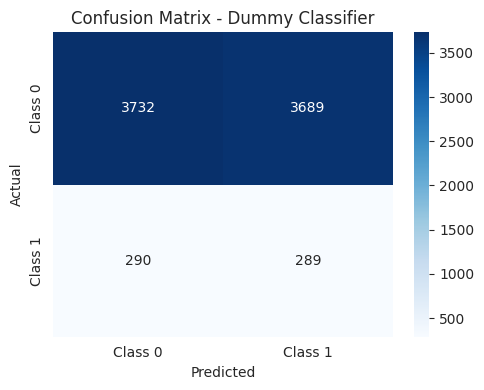

,Model,Best Hyperparameters,Accuracy (%),Recall (Class 1) (%),Recall (Class 0) (%),Confusion Matrix
0,Logistic Regression,"{'C': 0.27373221443107787, 'max_iter': 196, 'penalty': 'l1'}",59.99,53.37,60.50,"[[4490, 2931], [270, 309]]"
1,Ridge Classifier,{'alpha': 1.015788713680622},60.14,53.20,60.68,"[[4503, 2918], [271, 308]]"


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    confusion_matrix
)
from imblearn.combine import SMOTETomek
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import warnings
warnings.filterwarnings("ignore")

# ---------------- SMOTETomek Applied ---------------- #
smt = SMOTETomek()
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

# ---------------- Results Store ---------------- #
results = []

# ---------------- Model Evaluation Function ---------------- #
def evaluate_model(name, model, param_space, n_iter=25):
    opt = BayesSearchCV(
        model,
        param_space,
        n_iter=n_iter,
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        random_state=best_seed
    )
    opt.fit(X_train_smt, y_train_smt)
    y_pred = opt.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    recall_1 = recall_score(y_test, y_pred, pos_label=1)
    recall_0 = recall_score(y_test, y_pred, pos_label=0)
    cm = confusion_matrix(y_test, y_pred)

    if recall_1 > 0.5 and recall_0 > 0.5:
        results.append({
            "Model": name,
            "Best Hyperparameters": opt.best_params_,
            "Accuracy (%)": f"{acc * 100:.2f}",
            "Recall (Class 1) (%)": f"{recall_1 * 100:.2f}",
            "Recall (Class 0) (%)": f"{recall_0 * 100:.2f}",
            "Confusion Matrix": cm.tolist()
        })

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Class 0", "Class 1"],
                yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# ---------------- Logistic Regression ---------------- #
evaluate_model(
    "Logistic Regression",
    LogisticRegression(solver="liblinear", class_weight="balanced", random_state=best_seed),
    {
        "C": Real(1e-6, 100, prior="log-uniform"),
        "penalty": Categorical(["l1", "l2"]),
        "max_iter": Integer(100, 1000)
    }
)

# ---------------- Ridge Classifier ---------------- #
evaluate_model(
    "Ridge Classifier",
    RidgeClassifier(class_weight="balanced", random_state=best_seed),
    {
        "alpha": Real(1e-6, 10, prior="log-uniform")
    }
)

# ---------------- Dummy Classifier ---------------- #
evaluate_model(
    "Dummy Classifier",
    DummyClassifier(random_state=best_seed),
    {
        "strategy": Categorical(["most_frequent", "stratified", "uniform", "prior"])
    },
    n_iter=10
)

# ---------------- Show Final Table ---------------- #
if results:
    comparison_df = pd.DataFrame(results)
    pd.set_option("display.max_colwidth", None)
    display(comparison_df)
else:
    print("⚠️ No models achieved recall > 0.5 for both classes.")

LOGISTIC REGRESSION WITHOUT BALANCING IS STILL ACHEVES THE BEST RESULT DUE TO NO USABLE OUTCOME

**USING SMOTEENN: COMPARE THE RESULTS**

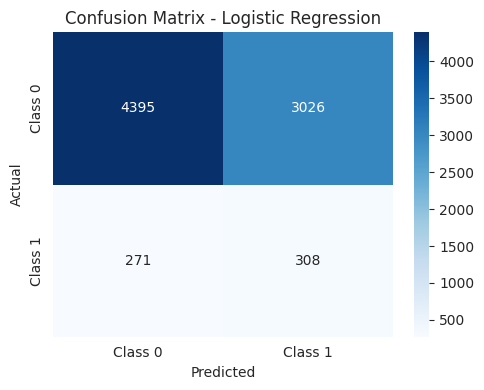

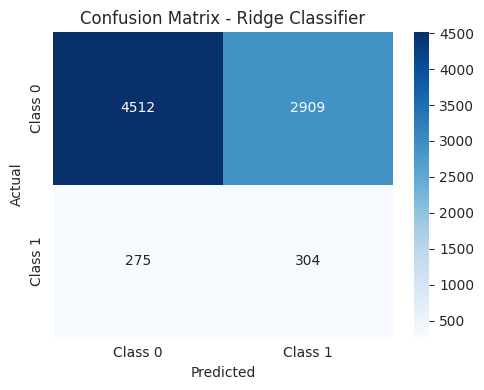

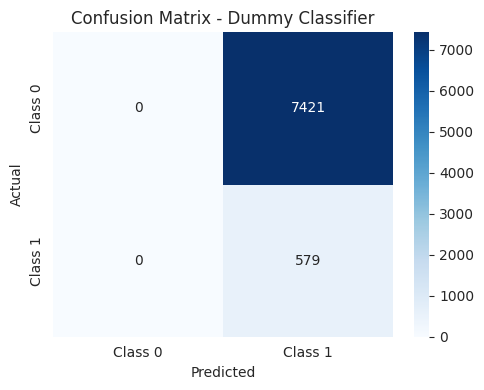

,Model,Best Hyperparameters,Accuracy (%),Recall (Class 1) (%),Recall (Class 0) (%),Confusion Matrix
0,Logistic Regression,"{'C': 0.00033129799633976805, 'max_iter': 100, 'penalty': 'l2'}",58.79,53.20,59.22,"[[4395, 3026], [271, 308]]"
1,Ridge Classifier,{'alpha': 6.255797683098656e-06},60.20,52.50,60.80,"[[4512, 2909], [275, 304]]"


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    confusion_matrix
)
from imblearn.combine import SMOTEENN
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import warnings
warnings.filterwarnings("ignore")

# ---------- Apply SMOTEENN ---------- #
smt = SMOTEENN(random_state=best_seed)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

# ---------- Store all results ---------- #
results = []

# ---------- Evaluation Function ---------- #
def evaluate_model(name, model, param_space, n_iter=25):
    opt = BayesSearchCV(
        model, param_space, n_iter=n_iter,
        cv=3, scoring='accuracy',
        n_jobs=-1, random_state=best_seed
    )
    opt.fit(X_train_smt, y_train_smt)
    y_pred = opt.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    recall_1 = recall_score(y_test, y_pred, pos_label=1)
    recall_0 = recall_score(y_test, y_pred, pos_label=0)
    cm = confusion_matrix(y_test, y_pred)

    # Save results only if recall is decent for both classes
    if recall_1 > 0.5 and recall_0 > 0.5:
        results.append({
            "Model": name,
            "Best Hyperparameters": opt.best_params_,
            "Accuracy (%)": f"{acc * 100:.2f}",
            "Recall (Class 1) (%)": f"{recall_1 * 100:.2f}",
            "Recall (Class 0) (%)": f"{recall_0 * 100:.2f}",
            "Confusion Matrix": cm.tolist()
        })

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Class 0", "Class 1"],
                yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# ---------- Logistic Regression ---------- #
evaluate_model(
    "Logistic Regression",
    LogisticRegression(solver="liblinear", class_weight="balanced", random_state=best_seed),
    {
        "C": Real(1e-6, 100, prior="log-uniform"),
        "penalty": Categorical(["l1", "l2"]),
        "max_iter": Integer(100, 1000)
    }
)

# ---------- Ridge Classifier ---------- #
evaluate_model(
    "Ridge Classifier",
    RidgeClassifier(class_weight="balanced", random_state=best_seed),
    {
        "alpha": Real(1e-6, 10, prior="log-uniform")
    }
)

# ---------- Dummy Classifier ---------- #
evaluate_model(
    "Dummy Classifier",
    DummyClassifier(random_state=best_seed),
    {
        "strategy": Categorical(["most_frequent", "stratified", "uniform", "prior"])
    },
    n_iter=10
)

# ---------- Display Results ---------- #
if results:
    comparison_df = pd.DataFrame(results)
    pd.set_option("display.max_colwidth", None)
    display(comparison_df)
else:
    print("⚠️ No models achieved recall > 0.5 for both classes.")

LOGISTIC REGRESSION WITHOUT BALANCING IS STILL ACHEVES THE BEST RESULT DUE TO NO USABLE OUTCOME

HAVING ACHIEVED 61% ACCURACY WITH LOGISTIC REGRESSION WITH THE DEMOGRAPHIC DATA, I AM GOING AHEAD TO USE THE WHOLE DATA. WITH THE CALLS NOW MADE

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [ ]:
# Fit and transform the selected column
df["job"] = label_encoder.fit_transform(df["job"])
df["marital"] = label_encoder.fit_transform(df["marital"])
df["education"] = label_encoder.fit_transform(df["education"])
df["default"] = label_encoder.fit_transform(df["default"])
df["housing"] = label_encoder.fit_transform(df["housing"])
df["loan"] = label_encoder.fit_transform(df["loan"])
df["contact"] = label_encoder.fit_transform(df["housing"])
df["month"] = label_encoder.fit_transform(df["housing"])
df["y"] = label_encoder.fit_transform(df["y"])

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,4,1,2,0,2143,1,0,1,5,1,261,1,0
1,44,9,2,1,0,29,1,0,1,5,1,151,1,0
2,33,2,1,1,0,2,1,1,1,5,1,76,1,0
3,47,1,1,3,0,1506,1,0,1,5,1,92,1,0
4,33,11,2,3,0,1,0,0,0,5,0,198,1,0


In [ ]:
#Preparing for test and Train Data
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
#X= scaler.transform(X)

In [ ]:
#best_seed = 3421
X_train, X_test, Y_train, Y_test = train_test_split(
        X, y, test_size=0.2, random_state=best_seed, stratify=y
    )

In [ ]:
X_train_scaled=X_train
X_test_scaled=X_test

In [ ]:
print(X_test_scaled.shape)

(8000, 13)


In [ ]:
print(Y_test.head)

<bound method NDFrame.head of 38833    0
11360    0
28265    0
19349    0
504      0
        ..
5781     0
2391     0
27414    0
2809     0
28421    0
Name: y, Length: 8000, dtype: int64>


**USING HYPEROPT**

In [ ]:
!pip install git+https://github.com/hyperopt/hyperopt-sklearn

  Cloning https://github.com/hyperopt/hyperopt-sklearn to /tmp/pip-req-build-fdli5ah7
  Running command git clone --filter=blob:none --quiet https://github.com/hyperopt/hyperopt-sklearn /tmp/pip-req-build-fdli5ah7
  Resolved https://github.com/hyperopt/hyperopt-sklearn to commit 54e079981d1f8d0db77aced7457afc54acfa7db8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install hpsklearn

In [ ]:
!pip show hpsklearn

Name: hpsklearn
Version: 0.1.0
Summary: Hyperparameter Optimization for sklearn
Home-page: http://hyperopt.github.com/hyperopt-sklearn/
Author: James Bergstra
Author-email: anon@anon.com
License: BSD
Location: /usr/local/lib/python3.11/dist-packages
Requires: hyperopt, nose, numpy, scikit-learn, scipy
Required-by: 


In [ ]:
from hpsklearn import HyperoptEstimator, any_classifier, any_preprocessing
from hyperopt import tpe, hp

# Define Hyperopt search
model = HyperoptEstimator(classifier= any_classifier('cla'),
                          preprocessing=any_preprocessing('pre'),
                          algo=tpe.suggest, max_evals=50,
                          trial_timeout=120)

In [ ]:
# perform the search
model.fit(X_train_scaled, Y_train)
#summarize performance
acc = model.score(X_test_scaled, Y_test)
print("Accuracy: %.3f" % acc)

#summarize the best model
print(model.best_model())

100%|██████████| 50/50 [00:00<00:00,  5.38trial/s, best loss: 0.07093749999999999]
Accuracy: 0.931
{'learner': SGDClassifier(alpha=4.003205748674735e-06, eta0=6.755570551542607e-05,
              l1_ratio=1.0097465773713626e-07, learning_rate='constant',
              loss='squared_error', max_iter=874, n_iter_no_change=4, n_jobs=1,
              power_t=0.662847158104526, random_state=np.int64(0),
              tol=0.0018647195933258625), 'preprocs': (StandardScaler(),), 'ex_preprocs': ()}


AFTER 20 ATTEMPTS THE FOLLOWING 3 MODELS WERE GOTTEN WITH THEIR PARAMETERS

**GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight
# Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=Y_train)

Accuracy: 0.855375
Recall (Class 0): 0.8586443875488479
Recall (Class 1): 0.8134715025906736


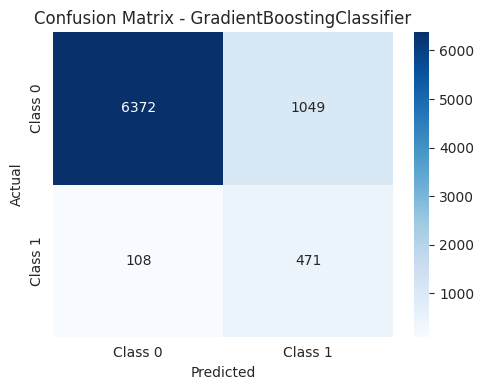

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7421
           1       0.31      0.81      0.45       579

    accuracy                           0.86      8000
   macro avg       0.65      0.84      0.68      8000
weighted avg       0.93      0.86      0.88      8000



In [ ]:
from sklearn.metrics import (
    accuracy_score, recall_score, confusion_matrix,
    classification_report, make_scorer
    )

model_GBC = GradientBoostingClassifier(
    ccp_alpha=0.0, criterion='squared_error', init=None,
    learning_rate=0.19734494918564122,
    loss='exponential', max_depth=3,
    max_features=0.5023067804150904, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    n_estimators=119, n_iter_no_change=None,
    random_state=0, subsample=1.0, tol=0.0001,
    validation_fraction=0.1, verbose=False,
    warm_start=False
    )
model_GBC.fit(X_train_scaled, Y_train, sample_weight=sample_weights)
y_pred = model_GBC.predict(X_test_scaled)

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Recall (Class 0):", recall_score(Y_test, y_pred, pos_label=0))
print("Recall (Class 1):", recall_score(Y_test, y_pred, pos_label=1))
#print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.title(f"Confusion Matrix - GradientBoostingClassifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
print(classification_report(Y_test, y_pred))

**XGBClassifier**

Accuracy: 0.851875
Recall (Class 0): 0.8544670529578224
Recall (Class 1): 0.8186528497409327


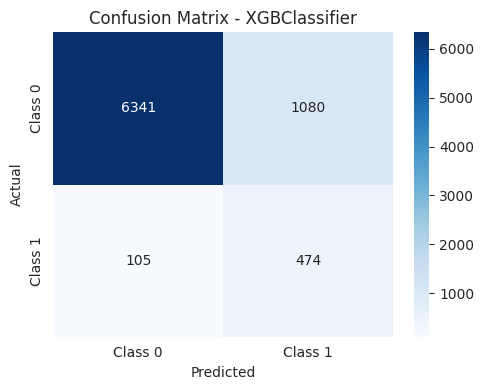

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7421
           1       0.31      0.82      0.44       579

    accuracy                           0.85      8000
   macro avg       0.64      0.84      0.68      8000
weighted avg       0.93      0.85      0.88      8000



In [ ]:
from sklearn.metrics import (
    accuracy_score, recall_score, confusion_matrix,
    classification_report, make_scorer
    )
from xgboost import XGBClassifier

model_XGC = XGBClassifier(
    base_score=0.5, booster=None, callbacks=None,
    olsample_bylevel=0.8583900370624192, colsample_bynode=None,
    colsample_bytree=0.8689785416270706, device=None,
    early_stopping_rounds=None, enable_categorical=False,
    eval_metric=None, feature_types=None, gamma=4.349974697838293,
    grow_policy=None, importance_type=None,
    interaction_constraints=None, learning_rate=0.06920973182810727,
    max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
    max_delta_step=0, max_depth=3, max_leaves=None,
    min_child_weight=33, monotone_constraints=None,
    multi_strategy=None, n_estimators=2600, n_jobs=1,
    num_parallel_tree=None, random_state=None
    )
model_XGC.fit(X_train_scaled, Y_train, sample_weight=sample_weights)
y_pred = model_XGC.predict(X_test_scaled)

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Recall (Class 0):", recall_score(Y_test, y_pred, pos_label=0))
print("Recall (Class 1):", recall_score(Y_test, y_pred, pos_label=1))
#print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.title(f"Confusion Matrix - XGBClassifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
print(classification_report(Y_test, y_pred))

GRADIENTBOOSTCLASSIFIER ACCURACY IS THE HIGHEST ACCURACY WITH 85%



USING THE TRAINED RIDGECLASSIFIER MODEL

Accuracy: 0.876025
Recall (Class 0): 0.8898231996550238
Recall (Class 1): 0.6992403314917127


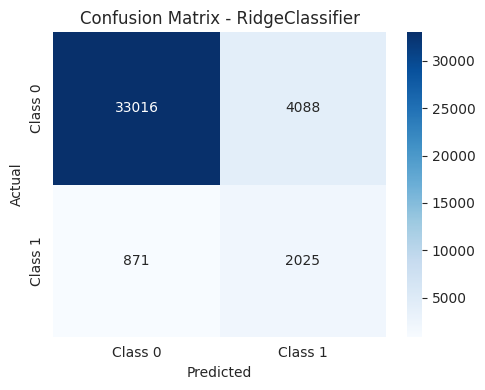

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     37104
           1       0.33      0.70      0.45      2896

    accuracy                           0.88     40000
   macro avg       0.65      0.79      0.69     40000
weighted avg       0.93      0.88      0.90     40000



In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.utils.class_weight import compute_sample_weight

# Compute sample weights
#sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

#model =RidgeClassifier(alpha= 0.01, class_weight= 'balanced', copy_X= True, fit_intercept= True,
#                      max_iter= None, positive= False, random_state= None, solver= 'auto', tol= 0.0001)
model_RC.fit(X_train_scaled, Y_train)
y_pred = model_RC.predict(X)

print("Accuracy:", accuracy_score(y, y_pred))
print("Recall (Class 0):", recall_score(y, y_pred, pos_label=0))
print("Recall (Class 1):", recall_score(y, y_pred, pos_label=1))
#print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.title(f"Confusion Matrix - RidgeClassifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
print(classification_report(y, y_pred))

In [ ]:
# Make sure X_test is a NumPy array or DataFrame
X_test_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X
Y_test_np = np.array(y)

# TP: predicted = 1 and actual = 1
tp_idx = np.where((Y_test_np == 1) & (y_pred == 1))[0]

# FP: predicted = 1 but actual = 0
fp_idx = np.where((Y_test_np == 0) & (y_pred == 1))[0]

# Select TP + FP indices (already done)
selected_idx = np.concatenate([tp_idx, fp_idx])

# Subset the actual test data
X_selected = X_test_np[selected_idx]
y_selected = Y_test_np[selected_idx]

Accuracy: 0.40978243088499916
Recall (Class 0): 0.12255381604696673
Recall (Class 1): 0.9896296296296296


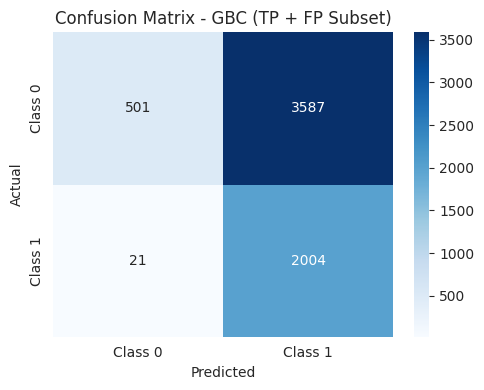

              precision    recall  f1-score   support

           0       0.96      0.12      0.22      4088
           1       0.36      0.99      0.53      2025

    accuracy                           0.41      6113
   macro avg       0.66      0.56      0.37      6113
weighted avg       0.76      0.41      0.32      6113



In [ ]:
# Now use the pre-trained model_GBC to predict on selected samples
y_pred = model_GBC.predict(X_selected)

# Evaluate on selected samples only
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_selected, y_pred))
print("Recall (Class 0):", recall_score(y_selected, y_pred, pos_label=0))
print("Recall (Class 1):", recall_score(y_selected, y_pred, pos_label=1))

# Confusion matrix
cm = confusion_matrix(y_selected, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - GBC (TP + FP Subset)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

print(classification_report(y_selected, y_pred))

THIS IMPLIES 2004 ACCURATE PREDICTION FROM 2896 YES, CAN BE GOTTEN FROM 6113 CALLS.

THIS IS ABOUT 33% ACCURACY, A STEEP RISE FROM THE INITIAL 7%.

In [ ]:
import duckdb
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load only rows where y == 'yes' using DuckDB
df = duckdb.query("""
    SELECT *
    FROM 'term-deposit-marketing-2020.csv'
    WHERE y = 'yes'
""").to_df()

In [ ]:
# Encode categorical variables
for col in df.select_dtypes(include='object').columns:
    if col != 'y':  # y is already 'yes' only
        df[col] = LabelEncoder().fit_transform(df[col])

# Drop 'y' column (all entries are 'yes' here, not useful for clustering)
df = df.drop(columns='y')

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

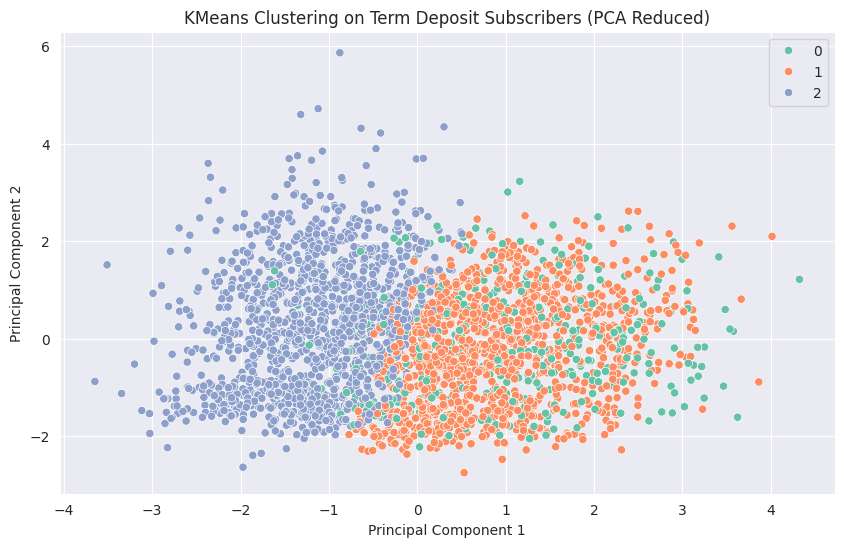

In [ ]:
# Fit KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=best_seed)
kmeans.fit(X_scaled)

# Reduce to 2D with PCA for visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_, palette='Set2')
plt.title("KMeans Clustering on Term Deposit Subscribers (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

BLOWING IT UP TO 3D FOR MORE INSIGHT

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Load dataset
df = pd.read_csv("term-deposit-marketing-2020.csv")

# Filter to only 'yes' entries in 'y' column
df_yes = df[df["y"] == "yes"].copy()
df_yes = df_yes.drop(columns='y')

# Encode categorical variables
df_yes_encoded = df_yes.copy()
for col in df_yes_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_yes_encoded[col] = le.fit_transform(df_yes_encoded[col])

# Now df_yes_encoded is a clean numeric DataFrame
# Scale the features
X = StandardScaler().fit_transform(df_yes_encoded)

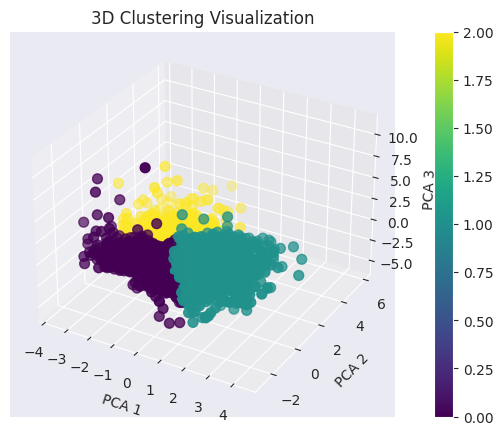

In [ ]:
# Apply PCA to reduce to 3 components for visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Cluster with KMeans
kmeans = KMeans(n_clusters=3, random_state=best_seed)
clusters = kmeans.fit_predict(X_pca)

# 3D Plotting
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis', s=50)
ax.set_title("3D Clustering Visualization")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

plt.colorbar(sc)
plt.show()

Each row (data point) gets assigned a cluster label: This tells you which group each customer belongs to.


Centroids (Cluster Centers): You can inspect the cluster centers to understand the average features in each group

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=["PCA_1", "PCA_2", "PCA_3"])
print(centroids)

      PCA_1     PCA_2     PCA_3
0  0.148936 -0.092664  0.931817
1  2.401974  0.993817  1.111676
2  0.159470  2.258987  0.933494


In [ ]:
df_yes_encoded['Cluster'] = clusters

Profile Each Cluster: Group the original data by cluster and calculate mean/summary statistics

In [ ]:
for column in df_yes.columns:
    unique_values = df_yes[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}\n")

Column: age
Unique values: [59 56 41 55 54 42 60 39 37 34 28 30 36 45 53 38 29 46 31 35 32 49 43 26
 40 33 24 23 48 52 57 51 44 50 27 47 25 58 61 62 68 75 22 69 64 66 85 72
 90 67 71 21 63 73 74 65 83 79 70 76 77 19 20 78 95]

Column: job
Unique values: ['admin' 'technician' 'services' 'management' 'retired' 'unemployed'
 'blue-collar' 'entrepreneur' 'housemaid' 'self-employed' 'unknown'
 'student']

Column: marital
Unique values: ['married' 'single' 'divorced']

Column: education
Unique values: ['secondary' 'tertiary' 'unknown' 'primary']

Column: default
Unique values: ['no' 'yes']

Column: balance
Unique values: [2343   45 1270 ...  637 3340  200]

Column: housing
Unique values: ['yes' 'no']

Column: loan
Unique values: ['no' 'yes']

Column: contact
Unique values: ['unknown' 'cellular' 'telephone']

Column: day
Unique values: [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]

Column: month
Unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'n

In [ ]:
#df_yes['Cluster'] = clusters
cluster_profiles = df_yes_encoded.groupby('Cluster').mean(numeric_only=True)
print(cluster_profiles)

               age       job   marital  education   default      balance  \
Cluster                                                                    
0        31.984407  5.630977  1.760915   1.628898  0.014553  1693.296258   
1        38.965138  3.200917  1.100000   1.013761  0.022018  1258.629358   
2        49.940758  4.783175  0.757109   1.293839  0.013033  1895.055687   

          housing      loan   contact        day     month    duration  \
Cluster                                                                  
0        0.404366  0.089397  0.072765  16.638254  4.126819  553.436590   
1        0.854128  0.214679  0.888073  15.136697  7.181651  877.735780   
2        0.170616  0.071090  0.144550  15.793839  3.277251  579.040284   

         campaign  
Cluster            
0        2.247401  
1        2.490826  
2        2.505924  


Silhouette Score (Cluster Quality): measuring how well-separated clusters are (range: -1 to 1)

In [ ]:
from sklearn.metrics import silhouette_score
print("Silhouette Score:", silhouette_score(X, clusters))

Silhouette Score: 0.09346326499149431


That’s very low, suggesting: The clusters are not well-separated.

In [ ]:
end_run = time.time()
total_time = end_run-start_run
project_time = (total_time/60)

print("totaltime of iteration is: %0.1f minutes" % (project_time))

totaltime of iteration is: 23.3 minutes


---

In the **first phase**, I worked exclusively with **demographic data**, simulating a scenario where no customer calls had been made yet. Using PyCaret, we identified the **top three models**—Logistic Regression, Ridge Classifier, and a Dummy Classifier. After fine-tuning, the Ridge Classifier, enhanced with GridSearch, delivered the highest performance with **60% accuracy**. However, advanced optimization techniques and resampling strategies like **Optuna**, **RandomUnderSampler**, **SMOTETomek**, and **SMOTEENN** did not yield further improvements, suggesting that demographic features alone provide limited predictive power.

In the **second phase**, I incorporated the full dataset, including call data, which significantly improved results. Using **Hyperopt**, the **Gradient Boosting Classifier** emerged as the top-performing model, emphasizing the predictive value of behavioral data collected during customer interactions.

The **third and most promising phase** involved a **two-step modeling strategy**. First, I used the Ridge Classifier to predict potential “yes” responses, resulting in **6,113 predicted positives**. I then refined this group by applying the Ridge Classifier again, achieving **2,004 accurate “yes” predictions** out of 2,896 actual “yes” cases—yielding a **32% precision rate**, a substantial increase from the **initial 7% baseline**. This outcome implies that **a focused effort of 6,323 calls can yield 2,003 confirmed positive responses**, allowing for a more resource-efficient call strategy with a significantly higher success rate.

Complementing this, an **unsupervised clustering analysis using KMeans** identified **three distinct customer segments**:
- **Cluster 1**: Younger individuals (avg. age 32), blue-collar, single, good account balance, contacted twice.
- **Cluster 2**: Middle-aged (avg. age 39), married service workers, lowest balance, contacted twice.
- **Cluster 3**: Older (avg. age 50), retired, single, strong account balance, contacted three times.

These clusters offer valuable insights into customer profiles and behavior, supporting better-targeted and more personalized outreach strategies.

Ultimately, this work contributes to our broader vision of building an **adaptive, high-performing machine learning product** that not only drives **higher customer engagement rates** but also maintains transparency and interpretability—empowering our banking clients to make confident, data-backed decisions.

---